# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram 

import sys
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')
import stockstats
from stockstats import StockDataFrame as Sdf

from nsepy import get_history
from datetime import date

import Technical_Indicators_v4 as ti

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#import random
#random.seed(7)

# PORTFOLIO CREATION

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance and returns a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')

# Sector-wise sorted list of stocks 
df.sort_values(by='Industry')

Company Name                  Industry  \
18                            Hero MotoCorp Ltd.                AUTOMOBILE   
14                            Eicher Motors Ltd.                AUTOMOBILE   
41                              Tata Motors Ltd.                AUTOMOBILE   
10                                    Bosch Ltd.                AUTOMOBILE   
33                      Maruti Suzuki India Ltd.                AUTOMOBILE   
5                                Bajaj Auto Ltd.                AUTOMOBILE   
32                      Mahindra & Mahindra Ltd.                AUTOMOBILE   
45                         UltraTech Cement Ltd.  CEMENT & CEMENT PRODUCTS   
1                            Ambuja Cements Ltd.  CEMENT & CEMENT PRODUCTS   
30                          Larsen & Toubro Ltd.              CONSTRUCTION   
2                              Asian Paints Ltd.            CONSUMER GOODS   
23                                    I T C Ltd.            CONSUMER GOODS   
21                       Hindustan Unilever Ltd.            CONSUMER GOODS   
20          Hindustan Petroleum Corporation Ltd.                    ENERGY   
34                                     NTPC Ltd.                    ENERGY   
26                   Indian Oil Corporation Ltd.                    ENERGY   
37                      Reliance Industries Ltd.                    ENERGY   
35            Oil & Natural Gas Corporation Ltd.                    ENERGY   
36          Power Grid Corporation of India Ltd.                    ENERGY   
15                             GAIL (India) Ltd.                    ENERGY   
7              Bharat Petroleum Corporation Ltd.                    ENERGY   
44                                      UPL Ltd.  FERTILISERS & PESTICIDES   
38                           State Bank of India        FINANCIAL SERVICES   
4                                 Axis Bank Ltd.        FINANCIAL SERVICES   
6                             Bajaj Finance Ltd.        FINANCIAL SERVICES   
29                      Kotak Mahindra Bank Ltd.        FINANCIAL SERVICES   
17                                HDFC Bank Ltd.        FINANCIAL SERVICES   
27                            IndusInd Bank Ltd.        FINANCIAL SERVICES   
25               Indiabulls Housing Finance Ltd.        FINANCIAL SERVICES   
48                                 Yes Bank Ltd.        FINANCIAL SERVICES   
22  Housing Development Finance Corporation Ltd.        FINANCIAL SERVICES   
24                               ICICI Bank Ltd.        FINANCIAL SERVICES   
28                                  Infosys Ltd.                        IT   
40                Tata Consultancy Services Ltd.                        IT   
16                         HCL Technologies Ltd.                        IT   
47                                    Wipro Ltd.                        IT   
43                            Tech Mahindra Ltd.                        IT   
49            Zee Entertainment Enterprises Ltd.     MEDIA & ENTERTAINMENT   
19                      Hindalco Industries Ltd.                    METALS   
12                               Coal India Ltd.                    METALS   
42                               Tata Steel Ltd.                    METALS   
46                                  Vedanta Ltd.                    METALS   
39            Sun Pharmaceutical Industries Ltd.                    PHARMA   
13                 Dr. Reddy's Laboratories Ltd.                    PHARMA   
11                                    Cipla Ltd.                    PHARMA   
3                          Aurobindo Pharma Ltd.                    PHARMA   
31                                    Lupin Ltd.                    PHARMA   
0     Adani Ports and Special Economic Zone Ltd.                  SERVICES   
9                           Bharti Infratel Ltd.                   TELECOM   
8                             Bharti Airtel Ltd.                   TELECOM   

        Symbol Series     ISIN Code  
18  HEROMOTOCO     

### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
""" Taking 5 years historic data for creating clusters based on daily-returns of stocks for NIFTY50 """

# Date format is 'yyyy-mm-dd'

start_date = '2013-01-01' 
end_date = '2018-01-01' 

In [6]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  50 of 50 downloaded


In [7]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1233 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2013-01-01 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [8]:
adj_close = panel_data.loc['Adj Close']
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01  1168.437134            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03  1191.802490            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-07   235.428085            NaN     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

In [9]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS      0
AMBUJACEM.NS       0
ASIANPAINT.NS      0
AUROPHARMA.NS      0
AXISBANK.NS       58
BAJAJ-AUTO.NS    493
BAJFINANCE.NS      0
BHARTIARTL.NS      0
BOSCHLTD.NS        0
BPCL.NS            0
CIPLA.NS           0
COALINDIA.NS       0
DRREDDY.NS         0
EICHERMOT.NS       0
GAIL.NS            0
HCLTECH.NS         0
HDFC.NS            0
HDFCBANK.NS        0
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDPETRO.NS       0
HINDUNILVR.NS      0
IBULHSGFIN.NS    140
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFRATEL.NS        0
INFY.NS            0
IOC.NS             0
ITC.NS             0
KOTAKBANK.NS       0
LT.NS              0
LUPIN.NS           0
M&M.NS             0
MARUTI.NS          0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBIN.NS           18
SUNPHARMA.NS       0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
ULTRACEMCO.NS      0
UPL.NS       

### Filling the missing data with the forward and backward fill methods

In [10]:
# Forward fill
adj_close = adj_close.fillna(method='ffill')

# Backward fill
adj_close = adj_close.fillna(method = 'bfill')

In [11]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    0
AMBUJACEM.NS     0
ASIANPAINT.NS    0
AUROPHARMA.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BOSCHLTD.NS      0
BPCL.NS          0
CIPLA.NS         0
COALINDIA.NS     0
DRREDDY.NS       0
EICHERMOT.NS     0
GAIL.NS          0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
IBULHSGFIN.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFRATEL.NS      0
INFY.NS          0
IOC.NS           0
ITC.NS           0
KOTAKBANK.NS     0
LT.NS            0
LUPIN.NS         0
M&M.NS           0
MARUTI.NS        0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
VEDL.NS          0
WIPRO.NS         0
YESBANK.NS       0
ZEEL.NS          0
dtype: i

In [12]:
adj_close.to_csv('stocks_adj_close.csv')
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01  1168.437134    2300.317871     101.747940     312.294800   
2013-01-02   237.828903    2300.317871     100.630241     311.276733   
2013-01-03  1191.802490    2300.317871     103.339737     318.015167   
2013-01-04   236.474152    2300.317871     103.388054     317.045593   
2013-01-07   235.428085    2300.317871     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

### Caluclating daily-returns 

In [13]:
daily_returns = pd.DataFrame()

In [14]:
daily_returns = adj_close.pct_change()
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01            NaN           NaN            NaN            NaN   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01          NaN            NaN            NaN            NaN   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01          NaN       NaN    ...               NaN           NaN   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01       NaN       NaN            NaN       NaN       NaN       NaN   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01         NaN       NaN  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily-returns)

In [15]:
daily_returns.iloc[0, :] = 0
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01       0.000000      0.000000       0.000000       0.000000   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01     0.000000            0.0       0.000000       0.000000   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01     0.000000  0.000000    ...          0.000000      0.000000   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01    0.000000  0.000000  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

In [16]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

Date  ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
0 2013-01-01       0.000000      0.000000       0.000000       0.000000   
1 2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2 2013-01-03      -0.001083      0.010771       0.005661       0.002479   
3 2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
4 2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

   AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  BOSCHLTD.NS  \
0     0.000000            0.0       0.000000       0.000000     0.000000   
1    -0.796456            0.0      -0.010985      -0.003260     0.009347   
2     4.011176            0.0       0.026925       0.021648    -0.007023   
3    -0.801583            0.0       0.000468      -0.003049    -0.006669   
4    -0.004424            0.0      -0.001476      -0.000612    -0.001835   

     ...     TATAMOTORS.NS  TATASTEEL.NS    TCS.NS  TECHM.NS  ULTRACEMCO.NS  \
0    ...          0.000000      0.000000  0.000000  0.000000       0.000000   
1    ...          0.003944     -0.000113 -0.000672  0.006478       0.006155   
2    ...          0.000315      0.009470  0.013694  0.001754      -0.005110   
3    ...         -0.008487     -0.019896  0.014524  0.001224       0.008420   
4    ...         -0.006816      0.017072 -0.003348 -0.016395      -0.000588   

     UPL.NS   VEDL.NS  WIPRO.NS  YESBANK.NS   ZEEL.NS  
0  0.000000  0.000000  0.000000    0.000000  0.000000  
1 -0.005287  0.021652 -0.007936    0.022746  0.034923  
2  0.038725  0.007393  0.010286    0.008917  0.000216  
3 -0.006579 -0.013209  0.014706   -0.006400 -0.017950  
4  0.009934  0.004710  0.003221    0.018812 -0.016736  

[5 rows x 51 columns]

In [17]:
daily_returns = daily_returns.T
daily_returns.head()

0                    1                    2     \
Date           2013-01-01 00:00:00  2013-01-02 00:00:00  2013-01-03 00:00:00   
ADANIPORTS.NS                    0           0.00471679          -0.00108333   
AMBUJACEM.NS                     0            0.0121406             0.010771   
ASIANPAINT.NS                    0           -0.0115531           0.00566097   
AUROPHARMA.NS                    0            0.0426466           0.00247904   

                              3                    4                    5     \
Date           2013-01-04 00:00:00  2013-01-07 00:00:00  2013-01-08 00:00:00   
ADANIPORTS.NS          -0.00578447            0.0185455           -0.0185649   
AMBUJACEM.NS           -0.00169515            -0.010917          -0.00907528   
ASIANPAINT.NS            0.0012055          -0.00173783          -5.6768e-05   
AUROPHARMA.NS          -0.00272011         -0.000247879          -0.00446434   

                              6                    7                    8     \
Date           2013-01-09 00:00:00  2013-01-10 00:00:00  2013-01-11 00:00:00   
ADANIPORTS.NS           -0.0167334           0.00480974           -0.0301915   
AMBUJACEM.NS            -0.0247525           -0.0266497           -0.0279009   
ASIANPAINT.NS          -0.00681599          -0.00033242           -0.0144978   
AUROPHARMA.NS           -0.0209268           -0.0287531           -0.0332722   

                              9            ...                          1223  \
Date           2013-01-14 00:00:00         ...           2017-12-18 00:00:00   
ADANIPORTS.NS            0.0349278         ...                    0.00809767   
AMBUJACEM.NS             0.0195815         ...                   -0.00151284   
ASIANPAINT.NS             0.015374         ...                     0.0164924   
AUROPHARMA.NS            0.0409214         ...                    0.00674051   

                              1224                 1225                 1226  \
Date           2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
ADANIPORTS.NS           0.00296585          -0.00344996          -0.00519289   
AMBUJACEM.NS             0.0251893           -0.0118233           0.00429979   
ASIANPAINT.NS          0.000483601          -0.00193368           0.00211363   
AUROPHARMA.NS            0.0200863           0.00313592          -0.00581602   

                              1227                 1228                 1229  \
Date           2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
ADANIPORTS.NS         -0.000372841           0.00596791           -0.0008651   
AMBUJACEM.NS           -0.00372301            0.0213005          -0.00731797   
ASIANPAINT.NS          8.78601e-05            0.0112039          -0.00147725   
AUROPHARMA.NS          -0.00358319           0.00352266            0.0103115   

                              1230                 1231                 1232  
Date           2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
ADANIPORTS.NS           -0.0136071            0.0174316           -0.0147911  
AMBUJACEM.NS            0.00110574           0.00165684           -0.0147032  
ASIANPAINT.NS          -0.00404684            0.0123208           -0.0128183  
AUROPHARMA.NS           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1233 columns]

In [18]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index                    0                    1  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

                     2                    3                    4  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566097            0.0012055          -0.00173783   
4           0.00247904          -0.00272011         -0.000247879   

                     5                    6                    7  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3          -5.6768e-05          -0.00681599          -0.00033242   
4          -0.00446434           -0.0209268           -0.0287531   

                     8         ...                          1223  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164924   
4           -0.0332722         ...                    0.00674051   

                  1224                 1225                 1226  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483601          -0.00193368           0.00211363   
4            0.0200863           0.00313592          -0.00581602   

                  1227                 1228                 1229  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78601e-05            0.0112039          -0.00147725   
4          -0.00358319           0.00352266            0.0103115   

                  1230                 1231                 1232  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404684            0.0123208           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [19]:
column_names = daily_returns.iloc[0]
#column_names

In [20]:
daily_returns = daily_returns.rename(columns=column_names)
daily_returns.head()

Date  2013-01-01 00:00:00  2013-01-02 00:00:00  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

   2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566097            0.0012055          -0.00173783   
4           0.00247904          -0.00272011         -0.000247879   

   2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3          -5.6768e-05          -0.00681599          -0.00033242   
4          -0.00446434           -0.0209268           -0.0287531   

   2013-01-11 00:00:00         ...           2017-12-18 00:00:00  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164924   
4           -0.0332722         ...                    0.00674051   

   2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483601          -0.00193368           0.00211363   
4            0.0200863           0.00313592          -0.00581602   

   2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78601e-05            0.0112039          -0.00147725   
4          -0.00358319           0.00352266            0.0103115   

   2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404684            0.0123208           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [21]:
daily_returns = daily_returns.drop(daily_returns.index[[0]])
daily_returns.head()

Date 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
1  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
2   AMBUJACEM.NS                   0           0.0121406            0.010771   
3  ASIANPAINT.NS                   0          -0.0115531          0.00566097   
4  AUROPHARMA.NS                   0           0.0426466          0.00247904   
5    AXISBANK.NS                   0           -0.796456             4.01118   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
1         -0.00578447           0.0185455          -0.0185649   
2         -0.00169515           -0.010917         -0.00907528   
3           0.0012055         -0.00173783         -5.6768e-05   
4         -0.00272011        -0.000247879         -0.00446434   
5           -0.801583          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
1          -0.0167334          0.00480974          -0.0301915   
2          -0.0247525          -0.0266497          -0.0279009   
3         -0.00681599         -0.00033242          -0.0144978   
4          -0.0209268          -0.0287531          -0.0332722   
5             3.96085           0.0135961         -0.00285085   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
1         ...                  0.00809767          0.00296585   
2         ...                 -0.00151284           0.0251893   
3         ...                   0.0164924         0.000483601   
4         ...                  0.00674051           0.0200863   
5         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
1         -0.00344996         -0.00519289        -0.000372841   
2          -0.0118233          0.00429979         -0.00372301   
3         -0.00193368          0.00211363         8.78601e-05   
4          0.00313592         -0.00581602         -0.00358319   
5          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
1          0.00596791          -0.0008651          -0.0136071   
2           0.0213005         -0.00731797          0.00110574   
3           0.0112039         -0.00147725         -0.00404684   
4          0.00352266           0.0103115          -0.0106405   
5          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
1           0.0174316          -0.0147911  
2          0.00165684          -0.0147032  
3           0.0123208          -0.0128183  
4          0.00665786         -0.00581441  
5           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [22]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0      1  ADANIPORTS.NS                   0          0.00471679   
1      2   AMBUJACEM.NS                   0           0.0121406   
2      3  ASIANPAINT.NS                   0          -0.0115531   
3      4  AUROPHARMA.NS                   0           0.0426466   
4      5    AXISBANK.NS                   0           -0.796456   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566097           0.0012055         -0.00173783   
3          0.00247904         -0.00272011        -0.000247879   
4             4.01118           -0.801583          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2         -5.6768e-05         -0.00681599         -0.00033242   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167             3.96085           0.0135961   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [23]:
daily_returns.loc[:,'index'] = daily_returns.iloc[:,1] 

In [24]:
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0  ADANIPORTS.NS  ADANIPORTS.NS                   0          0.00471679   
1   AMBUJACEM.NS   AMBUJACEM.NS                   0           0.0121406   
2  ASIANPAINT.NS  ASIANPAINT.NS                   0          -0.0115531   
3  AUROPHARMA.NS  AUROPHARMA.NS                   0           0.0426466   
4    AXISBANK.NS    AXISBANK.NS                   0           -0.796456   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566097           0.0012055         -0.00173783   
3          0.00247904         -0.00272011        -0.000247879   
4             4.01118           -0.801583          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2         -5.6768e-05         -0.00681599         -0.00033242   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167             3.96085           0.0135961   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [25]:
daily_returns = daily_returns.drop(daily_returns.columns[[1]], axis=1)
daily_returns.head()

index 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
0  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
1   AMBUJACEM.NS                   0           0.0121406            0.010771   
2  ASIANPAINT.NS                   0          -0.0115531          0.00566097   
3  AUROPHARMA.NS                   0           0.0426466          0.00247904   
4    AXISBANK.NS                   0           -0.796456             4.01118   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
0         -0.00578447           0.0185455          -0.0185649   
1         -0.00169515           -0.010917         -0.00907528   
2           0.0012055         -0.00173783         -5.6768e-05   
3         -0.00272011        -0.000247879         -0.00446434   
4           -0.801583          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
0          -0.0167334          0.00480974          -0.0301915   
1          -0.0247525          -0.0266497          -0.0279009   
2         -0.00681599         -0.00033242          -0.0144978   
3          -0.0209268          -0.0287531          -0.0332722   
4             3.96085           0.0135961         -0.00285085   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [26]:
companies = daily_returns['index']
companies

0     ADANIPORTS.NS
1      AMBUJACEM.NS
2     ASIANPAINT.NS
3     AUROPHARMA.NS
4       AXISBANK.NS
5     BAJAJ-AUTO.NS
6     BAJFINANCE.NS
7     BHARTIARTL.NS
8       BOSCHLTD.NS
9           BPCL.NS
10         CIPLA.NS
11     COALINDIA.NS
12       DRREDDY.NS
13     EICHERMOT.NS
14          GAIL.NS
15       HCLTECH.NS
16          HDFC.NS
17      HDFCBANK.NS
18    HEROMOTOCO.NS
19      HINDALCO.NS
20     HINDPETRO.NS
21    HINDUNILVR.NS
22    IBULHSGFIN.NS
23     ICICIBANK.NS
24    INDUSINDBK.NS
25      INFRATEL.NS
26          INFY.NS
27           IOC.NS
28           ITC.NS
29     KOTAKBANK.NS
30            LT.NS
31         LUPIN.NS
32           M&M.NS
33        MARUTI.NS
34          NTPC.NS
35          ONGC.NS
36     POWERGRID.NS
37      RELIANCE.NS
38          SBIN.NS
39     SUNPHARMA.NS
40    TATAMOTORS.NS
41     TATASTEEL.NS
42           TCS.NS
43         TECHM.NS
44    ULTRACEMCO.NS
45           UPL.NS
46          VEDL.NS
47         WIPRO.NS
48       YESBANK.NS
49          ZEEL.NS


In [27]:
daily_returns = daily_returns.drop('index', axis=1)
daily_returns.head()

2013-01-01  2013-01-02  2013-01-03  2013-01-04   2013-01-07  2013-01-08  \
0          0  0.00471679 -0.00108333 -0.00578447    0.0185455  -0.0185649   
1          0   0.0121406    0.010771 -0.00169515    -0.010917 -0.00907528   
2          0  -0.0115531  0.00566097   0.0012055  -0.00173783 -5.6768e-05   
3          0   0.0426466  0.00247904 -0.00272011 -0.000247879 -0.00446434   
4          0   -0.796456     4.01118   -0.801583   -0.0044236 -0.00914167   

   2013-01-09  2013-01-10  2013-01-11 2013-01-14     ...      2017-12-18  \
0  -0.0167334  0.00480974  -0.0301915  0.0349278     ...      0.00809767   
1  -0.0247525  -0.0266497  -0.0279009  0.0195815     ...     -0.00151284   
2 -0.00681599 -0.00033242  -0.0144978   0.015374     ...       0.0164924   
3  -0.0209268  -0.0287531  -0.0332722  0.0409214     ...      0.00674051   
4     3.96085   0.0135961 -0.00285085  0.0161279     ...      0.00127751   

    2017-12-19  2017-12-20  2017-12-21   2017-12-22  2017-12-26   2017-12-27  \
0   0.00296585 -0.00344996 -0.00519289 -0.000372841  0.00596791   -0.0008651   
1    0.0251893  -0.0118233  0.00429979  -0.00372301   0.0213005  -0.00731797   
2  0.000483601 -0.00193368  0.00211363  8.78601e-05   0.0112039  -0.00147725   
3    0.0200863  0.00313592 -0.00581602  -0.00358319  0.00352266    0.0103115   
4   0.00911328  0.00153522   -0.010009   0.00847065  0.00252895 -0.000720764   

   2017-12-28  2017-12-29  2018-01-01  
0  -0.0136071   0.0174316  -0.0147911  
1  0.00110574  0.00165684  -0.0147032  
2 -0.00404684   0.0123208  -0.0128183  
3  -0.0106405  0.00665786 -0.00581441  
4   -0.013974   0.0312701  0.00274845  

[5 rows x 1233 columns]

In [28]:
daily_returns.shape

(50, 1233)

### Data preparation for Unsupervised Learning 

### To create a diversified portfolio of stocks we will cluster them and then identify one stock from each cluster that is closest to the centroid of the respective cluster 

## CLUSTERING - based on ONLY daily returns of the stocks

In [29]:
from sklearn import preprocessing
# normalize the data row-wise(sample-wise) for each stock's daily returns
dr_norm = preprocessing.normalize(daily_returns)
dr_norm

array([[ 0.        ,  0.00552943, -0.00126998, ..., -0.01595144,
         0.02043483, -0.01733937],
       [ 0.        ,  0.01962536,  0.01741137, ...,  0.00178744,
         0.00267829, -0.0237678 ],
       [ 0.        , -0.01986233,  0.00973245, ..., -0.00695742,
         0.02118226, -0.02203746],
       ...,
       [ 0.        , -0.01501664,  0.01946185, ...,  0.0086399 ,
         0.03839567,  0.01384835],
       [ 0.        ,  0.02568903,  0.01007031, ..., -0.00591291,
         0.00594403, -0.00913817],
       [ 0.        ,  0.05257221,  0.00032568, ..., -0.00384451,
        -0.01040674, -0.00672733]])

In [30]:
# Clustering

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num, random_state=7)
    k_means.fit(dr_norm)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_of_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

cluster_errors  num_of_clusters
0        38.607231                1
1        35.960799                2
2        34.155059                3
3        32.958425                4
4        31.553648                5
5        30.524645                6
6        29.155803                7
7        28.249132                8
8        27.340791                9
9        26.181423               10
10       25.330683               11
11       24.336362               12
12       23.320868               13
13       22.576181               14

Text(0.5,1,'Cluster_errors v/s No. of clusters')

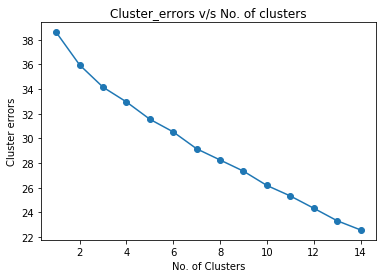

In [31]:
# Elbow plot to find the optimal number of clusters
plt.plot(clusters_df.num_of_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [32]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters=num_clusters, random_state=7)
k_means.fit(dr_norm)

# Cluster label for each stock
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\ncluster_centroids \n', cluster_centroids)

# results
results = pd.DataFrame([daily_returns.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
ticker_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([ticker_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [0, 2, 2, 3, 4, 0, 2, 2, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 4, 1, 2, 2, 2, 3, 2, 2, 0, 1, 2, 2, 0, 3, 0, 0, 4, 4, 2, 0, 0, 4, 2, 0]

unique_labels
 [0, 1, 2, 3, 4]

cluster_centroids 
 [[ 0.          0.01312669  0.0083358  ...  0.00175976  0.0099473
  -0.01617435]
 [ 0.          0.03226525  0.00474117 ... -0.00917196 -0.01238874
  -0.01114309]
 [ 0.          0.00741474  0.00290374 ... -0.00380369  0.0077577
  -0.01410265]
 [ 0.          0.01356413  0.00040208 ... -0.00432515  0.00396827
  -0.00013006]
 [ 0.         -0.00289438  0.02873572 ... -0.00287961  0.02570161
  -0.01079349]]


Ticker_name  Ticker_index  Cluster_label
0   ADANIPORTS.NS             0              0
46        VEDL.NS            46              0
45  ULTRACEMCO.NS            45              0
41  TATAMOTORS.NS            41              0
40         TCS.NS            40              0
38        SBIN.NS            38              0
34        NTPC.NS            34              0
25  IBULHSGFIN.NS            25              0
19    HINDALCO.NS            19              0
49        ZEEL.NS            49              0
5   BAJAJ-AUTO.NS             5              0
35        ONGC.NS            35              1
9     INFRATEL.NS             9              1
20   HINDPETRO.NS            20              1
27  INDUSINDBK.NS            27              1
14   EICHERMOT.NS            14              1
44         UPL.NS            44              2
37    RELIANCE.NS            37              2
36   POWERGRID.NS            36              2
28        INFY.NS            28              2
6   BAJFINANCE.NS             6              2
2   ASIANPAINT.NS             2              2
33      MARUTI.NS            33              2
32         M&M.NS            32              2
30          LT.NS            30              2
1    AMBUJACEM.NS             1              2
29   KOTAKBANK.NS            29              2
24   ICICIBANK.NS            24              2
7         BPCL.NS             7              2
48     YESBANK.NS            48              2
23         ITC.NS            23              2
11       CIPLA.NS            11              2
22        HDFC.NS            22              2
21  HINDUNILVR.NS            21              2
8   BHARTIARTL.NS             8              2
18  HEROMOTOCO.NS            18              2
17    HDFCBANK.NS            17              2
16     HCLTECH.NS            16              2
13     DRREDDY.NS            13              2
12   COALINDIA.NS            12              3
3   AUROPHARMA.NS             3              3
10    BOSCHLTD.NS            10              3
39   SUNPHARMA.NS            39              3
31       LUPIN.NS            31              3
42   TATASTEEL.NS            42              4
43       TECHM.NS            43              4
26         IOC.NS            26              4
47       WIPRO.NS            47              4
4     AXISBANK.NS             4              4
15        GAIL.NS            15              4

In [33]:
# Compute minimum distances between centroid of each cluster and set of points in the respective cluster

from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []


data_list = dr_norm.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    print('\nTicker indices in cluster {}'.format(i))
    print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = dr_norm[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = dr_norm[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)



Ticker indices in cluster 0
[0, 5, 19, 25, 34, 38, 40, 41, 45, 46, 49]

Ticker indices in cluster 1
[9, 14, 20, 27, 35]

Ticker indices in cluster 2
[1, 2, 6, 7, 8, 11, 13, 16, 17, 18, 21, 22, 23, 24, 28, 29, 30, 32, 33, 36, 37, 44, 48]

Ticker indices in cluster 3
[3, 10, 12, 31, 39]

Ticker indices in cluster 4
[4, 15, 26, 42, 43, 47]


In [34]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [41, 9, 17, 31, 42]


In [35]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
# Rename index column as 'Cluster_No.'
ticker_names.index.name = 'Cluster_No.'
ticker_names.columns = ['Ticker_index', 'Ticker_name']


# Portfolio of stocks

In [36]:
# Writing the ticker names of the portfolio into .csv file
ticker_names.to_csv('Portfolio_stocks.csv')
print('Portfolio of stocks\n')
ticker_names

Portfolio of stocks



Ticker_index    Ticker_name
Cluster_No.                             
0                      41  TATAMOTORS.NS
1                       9    INFRATEL.NS
2                      17    HDFCBANK.NS
3                      31       LUPIN.NS
4                      42   TATASTEEL.NS

# Investment startegy:
# How to distribute funds among the portfolio of stocks to get maximum returns with minimum risk?

# Portfolio Optimization

In [37]:
portfolio_df = pd.read_csv('Portfolio_stocks.csv', index_col=0)
print('Portfolio of stocks')
portfolio_df

Portfolio of stocks


Ticker_index    Ticker_name
Cluster_No.                             
0                      41  TATAMOTORS.NS
1                       9    INFRATEL.NS
2                      17    HDFCBANK.NS
3                      31       LUPIN.NS
4                      42   TATASTEEL.NS

In [38]:
port_stocks = portfolio_df['Ticker_name'].values.tolist()
port_stocks

['TATAMOTORS.NS', 'INFRATEL.NS', 'HDFCBANK.NS', 'LUPIN.NS', 'TATASTEEL.NS']

In [39]:
adj_close_df = pd.read_csv('stocks_adj_close.csv', index_col=0)[port_stocks]
adj_close_df.head()

TATAMOTORS.NS  INFRATEL.NS  HDFCBANK.NS    LUPIN.NS  TATASTEEL.NS
Date                                                                         
2013-01-01     309.782898   175.099014   654.123230  599.083557    368.073029
2013-01-02     311.004669   178.419449   656.846680  599.278503    368.031586
2013-01-03     311.102509   180.943008   653.024231  593.382141    371.516693
2013-01-04     308.462219   183.422272   649.201782  589.142761    364.125061
2013-01-07     306.359711   183.643631   638.546509  583.587463    370.341492



***************Analysis of individual stock in the portfolio***************

The annualised mean return of stock TATAMOTORS.NS is 0.12, and the annualised volatility (standard deviation) is 0.35

The annualised mean return of stock INFRATEL.NS is 0.21, and the annualised volatility (standard deviation) is 0.35

The annualised mean return of stock HDFCBANK.NS is 0.23, and the annualised volatility (standard deviation) is 0.2

The annualised mean return of stock LUPIN.NS is 0.12, and the annualised volatility (standard deviation) is 0.28

The annualised mean return of stock TATASTEEL.NS is 0.19, and the annualised volatility (standard deviation) is 0.36


******************************For the entire Portfolio******************************

Portfolio expected annualised return is 0.18 and volatility is 0.19

*************************************************************************************


Monte Carlo simulation of 25000 runs of different randomly generated weights for the individu

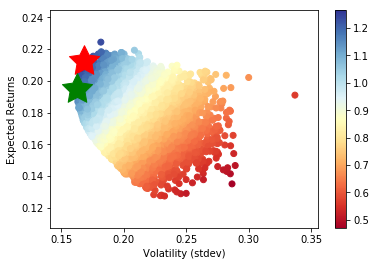

In [40]:


print('\n\n***************Analysis of individual stock in the portfolio***************')
for i in range(0, len(port_stocks)):

    returns = adj_close_df.iloc[:, i].pct_change()

    mean_return = returns.mean()
    return_stdev = returns.std()

    annualised_return = round(mean_return * 252, 2) # 252 trading days in an year
    annualised_stdev = round(return_stdev * np.sqrt(252), 2)

    print ('\nThe annualised mean return of stock {} is {}, and the annualised volatility (standard deviation) is {}'
           .format(port_stocks[i], annualised_return, annualised_stdev))
    
    
""" Similarly, calculate the expected return and volatility (standard deviation) for 
the entire portfolio of stocks. This will capture the benefits of diversification of less than perfect correlation 
between the stocks in the portfolio. """

""" We need our first input, the weights of the stocks in the portfolio – that is, 
how much of each stock do we hold as a percentage of the entire portfolio holdings.
Lets initially assume equal weights"(0.20 in our case) for all the 5 stocks in this portfolio. """

""" We can calculate the portfolio expected return and volatility as follows: """

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set array holding portfolio weights of each stock
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)

#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
 
print('\n\n******************************For the entire Portfolio******************************')
print('\nPortfolio expected annualised return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))
print('\n*************************************************************************************\n\n')    
    
"""We now know the expected return and volatility of our current portfolio. 
But what if we aren’t happy with the level of volatility of our current portfolio and would like to reduce it? 
What if we are willing to take on more risk in search of a higher expected return? 
How can we rearrange the weight of each stock in our portfolio to achieve these goals?"""


"""We can use Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks 
(obviously making sure the weights sum to 100%) and then calculate the expected return, expected volatility and Sharpe Ratio 
for each of the randomly generated portfolios."""

print('Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks\n')

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(port_stocks)-1, num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
"""convert results array to Pandas DataFrame"""
results_frame = pd.DataFrame(results.T, columns=['Returns', 'Volatility', 'Sharpe_Ratio',
                                                 port_stocks[0], port_stocks[1],
                                                 port_stocks[2], port_stocks[3], port_stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()]
print('type(max_sharpe_port)', type(max_sharpe_port))

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
print('type(min_vol_port)', type(min_vol_port))

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Volatility, results_frame.Returns, c=results_frame.Sharpe_Ratio, cmap='RdYlBu')
plt.xlabel('Volatility (stdev)')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5,1,0), color='r',s=1000)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5,1,0), color='g', s=1000)


### Type-1: "Portfolio with Maximum Sharpe Ratio" - RED star in the above plot

In [41]:
print('\n"Type-1: Portfolio with Maximum Sharpe Ratio"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio\n')
print(max_sharpe_port)


"Type-1: Portfolio with Maximum Sharpe Ratio"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio

Returns          0.212349
Volatility       0.167989
Sharpe_Ratio     1.264070
TATAMOTORS.NS    0.001270
INFRATEL.NS      0.164675
HDFCBANK.NS      0.671271
LUPIN.NS         0.141091
TATASTEEL.NS     0.021692
Name: 8700, dtype: float64


### Type-2: "Portfolio with Minimum Volatility" - GREEN star in the above plot

In [42]:
print('\n"Type-2: Portfolio with Minimum Volatility (stdev)"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio\n')
print(min_vol_port)


"Type-2: Portfolio with Minimum Volatility (stdev)"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio

Returns          0.194853
Volatility       0.162779
Sharpe_Ratio     1.197044
TATAMOTORS.NS    0.083628
INFRATEL.NS      0.185154
HDFCBANK.NS      0.506667
LUPIN.NS         0.219258
TATASTEEL.NS     0.005294
Name: 20346, dtype: float64


# Fetching data for each stock in the portfolio of stocks

In [43]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv', index_col=0)
trading_tickers

Ticker_index    Ticker_name
Cluster_No.                             
0                      41  TATAMOTORS.NS
1                       9    INFRATEL.NS
2                      17    HDFCBANK.NS
3                      31       LUPIN.NS
4                      42   TATASTEEL.NS

In [44]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['TATAMOTORS.NS', 'INFRATEL.NS', 'HDFCBANK.NS', 'LUPIN.NS', 'TATASTEEL.NS']

### Fetching data for NIFTY 50 (^NSEI)

In [45]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [46]:
nse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902  5988.399902   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195  6001.700195   

            Volume  
Date                
2013-01-02       0  
2013-01-03       0  
2013-01-04       0  
2013-01-07       0  
2013-01-08       0

In [47]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

nse['Adj Close'] = nse['Adj Close'].shift(1)

In [48]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

NSE
Date                   
2013-01-02          NaN
2013-01-03  5993.250000
2013-01-04  6009.500000
2013-01-07  6016.149902
2013-01-08  5988.399902

### Fetching data for S&P 500 (^GSPC)

In [49]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [50]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000

In [51]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis=1 , inplace = True)
spy.head()

SPY
Date                   
2013-01-02  1462.420044
2013-01-03  1459.369995
2013-01-04  1466.469971
2013-01-07  1461.890015
2013-01-08  1457.150024

### Fetching data for Dow Jones Industrial Average (^DJI)

In [52]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [53]:
dji.head()

Open          High           Low         Close  \
Date                                                                 
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-07  13436.129883  13436.129883  13343.320313  13384.290039   
2013-01-08  13377.419922  13377.419922  13293.129883  13328.849609   

               Adj Close     Volume  
Date                                 
2013-01-02  13412.549805  161430000  
2013-01-03  13391.360352  129630000  
2013-01-04  13435.209961  107590000  
2013-01-07  13384.290039  113120000  
2013-01-08  13328.849609  129570000

In [54]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

DJ
Date                    
2013-01-02  13412.549805
2013-01-03  13391.360352
2013-01-04  13435.209961
2013-01-07  13384.290039
2013-01-08  13328.849609

### Fetching data for NASDAQ Composite (^IXIC)

In [55]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [56]:
nasdaq.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-07  3089.169922  3102.350098  3083.879883  3098.810059  3098.810059   
2013-01-08  3098.459961  3103.389893  3076.600098  3091.810059  3091.810059   

                Volume  
Date                    
2013-01-02  2111300000  
2013-01-03  1769420000  
2013-01-04  1745140000  
2013-01-07  1702540000  
2013-01-08  1744380000

In [57]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

NASDAQ
Date                   
2013-01-02  3112.260010
2013-01-03  3100.570068
2013-01-04  3101.659912
2013-01-07  3098.810059
2013-01-08  3091.810059

### Fetching data for individual stocks from the portfolio of stocks

### Fetching data for Stock-1

In [58]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for TATAMOTORS.NS


In [59]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)
stock1_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             Volume  
Date                 
2013-01-01  3980485  
2013-01-02  6929286  
2013-01-03  6165017  
2013-01-04  8965650  
2013-01-07  4943021

In [60]:
# Fetching 'VWAP' from nsepy package for the same stock

stock1 = tickers_for_model[0].split('.')[0]
stock1

'TATAMOTORS'

In [61]:
# Date format for nsepy package 'yyyy,mm,dd'

data = get_history(symbol=stock1, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    316.30
2013-01-02    318.12
2013-01-03    319.06
2013-01-04    314.95
2013-01-07    315.40
Name: VWAP, dtype: float64

In [62]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock1_df = stock1_df.join(data['VWAP'])
stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             Volume    VWAP  
Date                         
2013-01-01  3980485  316.30  
2013-01-02  6929286  318.12  
2013-01-03  6165017  319.06  
2013-01-04  8965650  314.95  
2013-01-07  4943021  315.40

### Joining individual stock data with nse, spy, dji, nasdaq data

In [63]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  3980485  316.30  5993.250000  1462.420044  13412.549805   
2013-01-02  6929286  318.12  5993.250000  1462.420044  13412.549805   
2013-01-03  6165017  319.06  5993.250000  1459.369995  13391.360352   
2013-01-04  8965650  314.95  6009.500000  1466.469971  13435.209961   
2013-01-07  4943021  315.40  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-2

In [64]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for INFRATEL.NS


In [65]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)
stock2_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume  
Date                 
2013-01-01  2619486  
2013-01-02  5470399  
2013-01-03  3626134  
2013-01-04  4188477  
2013-01-07  2632614

In [66]:
# Fetching 'VWAP' from nsepy package

stock2 = tickers_for_model[1].split('.')[0]
stock2

'INFRATEL'

In [67]:
data = get_history(symbol=stock2, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    197.64
2013-01-02    200.96
2013-01-03    204.11
2013-01-04    207.22
2013-01-07    207.99
Name: VWAP, dtype: float64

In [68]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock2_df = stock2_df.join(data['VWAP'])
stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP  
Date                         
2013-01-01  2619486  197.64  
2013-01-02  5470399  200.96  
2013-01-03  3626134  204.11  
2013-01-04  4188477  207.22  
2013-01-07  2632614  207.99

### Joining individual stock data with nse, spy, dji, nasdaq data

In [69]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805   
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805   
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352   
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961   
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-3

In [70]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for HDFCBANK.NS


In [71]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)
stock3_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume  
Date                 
2013-01-01  1007303  
2013-01-02  2427399  
2013-01-03  2285683  
2013-01-04  2721127  
2013-01-07  2751142

In [72]:
# Fetching 'VWAP' from nsepy package

stock3 = tickers_for_model[2].split('.')[0]
stock3

'HDFCBANK'

In [73]:
data = get_history(symbol=stock3, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    682.68
2013-01-02    686.96
2013-01-03    684.70
2013-01-04    676.86
2013-01-07    671.03
Name: VWAP, dtype: float64

In [74]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock3_df = stock3_df.join(data['VWAP'])
stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume    VWAP  
Date                         
2013-01-01  1007303  682.68  
2013-01-02  2427399  686.96  
2013-01-03  2285683  684.70  
2013-01-04  2721127  676.86  
2013-01-07  2751142  671.03

### Joining individual stock data with nse, spy, dji, nasdaq data

In [75]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  1007303  682.68  5993.250000  1462.420044  13412.549805   
2013-01-02  2427399  686.96  5993.250000  1462.420044  13412.549805   
2013-01-03  2285683  684.70  5993.250000  1459.369995  13391.360352   
2013-01-04  2721127  676.86  6009.500000  1466.469971  13435.209961   
2013-01-07  2751142  671.03  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-4

In [76]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for LUPIN.NS


In [77]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)
stock4_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557  245907
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503  381107
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141  475306
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761  522833
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463  687589

In [78]:
# Fetching 'VWAP' from nsepy package

stock4 = tickers_for_model[3].split('.')[0]
stock4

'LUPIN'

In [79]:
data = get_history(symbol=stock4, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    615.70
2013-01-02    616.25
2013-01-03    609.67
2013-01-04    605.92
2013-01-07    601.43
Name: VWAP, dtype: float64

In [80]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock4_df = stock4_df.join(data['VWAP'])
stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP  
Date                        
2013-01-01  245907  615.70  
2013-01-02  381107  616.25  
2013-01-03  475306  609.67  
2013-01-04  522833  605.92  
2013-01-07  687589  601.43

### Joining individual stock data with nse, spy, dji, nasdaq data

In [81]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP          NSE          SPY            DJ  \
Date                                                                 
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805   
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805   
2013-01-03  475306  609.67  5993.250000  1459.369995  13391.360352   
2013-01-04  522833  605.92  6009.500000  1466.469971  13435.209961   
2013-01-07  687589  601.43  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-5

In [82]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for TATASTEEL.NS


In [83]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)
stock5_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume  
Date                 
2013-01-01  3258417  
2013-01-02  2725650  
2013-01-03  3446967  
2013-01-04  3825854  
2013-01-07  7192053

In [84]:
# Fetching 'VWAP' from nsepy package

stock5 = tickers_for_model[4].split('.')[0]
stock5

'TATASTEEL'

In [85]:
data = get_history(symbol=stock5, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    436.73
2013-01-02    441.05
2013-01-03    442.04
2013-01-04    434.01
2013-01-07    439.60
Name: VWAP, dtype: float64

In [86]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock5_df = stock5_df.join(data['VWAP'])
stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP  
Date                         
2013-01-01  3258417  436.73  
2013-01-02  2725650  441.05  
2013-01-03  3446967  442.04  
2013-01-04  3825854  434.01  
2013-01-07  7192053  439.60

### Joining individual stock data with nse, spy, dji, nasdaq data

In [87]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  3258417  436.73  5993.250000  1462.420044  13412.549805   
2013-01-02  2725650  441.05  5993.250000  1462.420044  13412.549805   
2013-01-03  3446967  442.04  5993.250000  1459.369995  13391.360352   
2013-01-04  3825854  434.01  6009.500000  1466.469971  13435.209961   
2013-01-07  7192053  439.60  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Creating stock_df for each stock in the portfolio of stocks

In [88]:
def add_vars_to_stock_df(tup_dfs, tickers_lst):
    """Creates dataframe for every stock in the portfolio of stocks"""    
    
    # Instantiating Technical Indicators object
    tech_ind = ti.technical_indicators()
    
    def calc_derived_vars(stk_df):
        """Creates dataframe containing derived variables for every stock in the portfolio of stocks"""
        
        # Calling functions from Technical_Indicators file

        stk_df = tech_ind.pcod(stk_df)
        stk_df = tech_ind.hld(stk_df)
        stk_df = tech_ind.stockRsi(stk_df, numOfDays=20)
        stk_df = tech_ind.bbands(stk_df, length=20, numsd=2) 
        stk_df = tech_ind.stma(stk_df, numOfDays=20) 
        stk_df = tech_ind.ltma(stk_df, numOfDays=120) 
        stk_df = tech_ind.ema(stk_df, numOfDays=20) 
        stk_df = tech_ind.scul(stk_df)
        stk_df = tech_ind.scll(stk_df)
        stk_df = tech_ind.stma_cuts_ltma(stk_df)
        stk_df = tech_ind.close_cuts_stma(stk_df)
        stk_df = tech_ind.close_cuts_ltma(stk_df)
        stk_df = tech_ind.daily_returns(stk_df)
        stk_df = tech_ind.daily_returns_NSE(stk_df)
        stk_df = tech_ind.daily_returns_SPY(stk_df)
        stk_df = tech_ind.daily_returns_DOWJONES(stk_df)
        stk_df = tech_ind.daily_returns_NASDAQ(stk_df)
        stk_df = tech_ind.price_movement(stk_df)
        stk_df = tech_ind.beta_values(stk_df)

        #time-series prediction for the stock using prophet
        stk_df.reset_index(inplace = True)
        stk_df = stk_df.rename(columns={'index':'Date'})
        stk_df, ts_data = tech_ind.TS_close_price(stk_df)
        
        # Convert date to week-of-day (Sunday, Monday...)
        stk_df['day_of_week'] = stk_df['ds'].dt.weekday_name       
        # Converting categorical 'day_of_week' variable to numeric variable
        le = LabelEncoder()
        new_name = 'le_'+'day_of_week'
        stk_df[new_name] = le.fit_transform(stk_df['day_of_week'])

        stk_df = Sdf.retype(stk_df)
        stk_df['tr'] = stk_df.get('tr') 
        stk_df['atr'] = stk_df.get('atr')
        stk_df['wr_10'] = stk_df.get('wr_10')
        stk_df['kdjk'] = stk_df.get('kdjk')
        stk_df['macd'] = stk_df.get('macd')        
        
        return stk_df
        
    all_data = pd.DataFrame()
    stk_df_lst = []
    
    for i in range(len(tup_dfs)):       
        stk_df = calc_derived_vars(tup_dfs[i])
        stk_df_lst.append(stk_df)     
        
        temp = pd.DataFrame()
        temp = stk_df.copy(deep=True)
        stock_name = tickers_lst[i].split('.')[0]
        temp['stock'] = stock_name
        all_data = pd.concat([all_data, temp])
        
        # Writing the stk_df data to .csv file
        stk_df.to_csv('{}'.format(tickers_lst[i]+'.csv'))
        #print(tickers_lst[i]+'.csv')
        
        
    # Writing the all stock data to .csv file
    all_data.to_csv('all_stock_data.csv')   
    
    tup_stock_dfs = tuple(stk_df_lst)
    return (tup_stock_dfs)    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  313.389008
1 2013-01-02  314.625000
2 2013-01-03  314.723999
3 2013-01-04  312.053009
4 2013-01-07  309.925995


          ds      y_orig         y
0 2013-01-01  313.389008  5.747445
1 2013-01-02  314.625000  5.751381
2 2013-01-03  314.723999  5.751696
3 2013-01-04  312.053009  5.743173
4 2013-01-07  309.925995  5.736334


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.002652    5.945036    6.057720
1224 2017-12-19  6.002441    5.943978    6.059073
1225 2017-12-20  6.000637    5.942005    6.060935
1226 2017-12-21  5.999867    5.941859    6.056811
1227 2017-12-22  6.001567    5.944088    6.057246
1228 2017-12-26  6.003976    5.944459    6.064122
1229 2017-12-27  6.003554    5.946312    6.058340
1230 2017-12-28  6.004130    5.945252    6.062188
1231 2017-12-29  6.007125    5.951432    6.062975
1232 2018-01-01  6.011764

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  197.750000
1 2013-01-02  201.500000
2 2013-01-03  204.350006
3 2013-01-04  207.149994
4 2013-01-07  207.399994


          ds      y_orig         y
0 2013-01-01  197.750000  5.287004
1 2013-01-02  201.500000  5.305789
2 2013-01-03  204.350006  5.319834
3 2013-01-04  207.149994  5.333443
4 2013-01-07  207.399994  5.334649


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  5.955718    5.904392    6.006011
1224 2017-12-19  5.953526    5.903908    6.002919
1225 2017-12-20  5.953210    5.904419    6.005032
1226 2017-12-21  5.952387    5.904688    6.002637
1227 2017-12-22  5.949206    5.895140    5.998428
1228 2017-12-26  5.943587    5.892424    5.992537
1229 2017-12-27  5.943514    5.894611    5.995059
1230 2017-12-28  5.942989    5.893359    5.991555
1231 2017-12-29  5.940144    5.890899    5.988247
1232 2018-01-01  5.937588

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  684.500000
1 2013-01-02  687.349976
2 2013-01-03  683.349976
3 2013-01-04  679.349976
4 2013-01-07  668.200012


          ds      y_orig         y
0 2013-01-01  684.500000  6.528689
1 2013-01-02  687.349976  6.532844
2 2013-01-03  683.349976  6.527007
3 2013-01-04  679.349976  6.521136
4 2013-01-07  668.200012  6.504588


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  7.524897    7.495873    7.553575
1224 2017-12-19  7.523933    7.496609    7.552934
1225 2017-12-20  7.524766    7.495081    7.554019
1226 2017-12-21  7.526836    7.497429    7.554400
1227 2017-12-22  7.528898    7.500073    7.557326
1228 2017-12-26  7.530401    7.502689    7.558438
1229 2017-12-27  7.531858    7.501944    7.561352
1230 2017-12-28  7.534551    7.508658    7.562253
1231 2017-12-29  7.537223    7.508752    7.564453
1232 2018-01-01  7.540757

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  614.700012
1 2013-01-02  614.900024
2 2013-01-03  608.849976
3 2013-01-04  604.500000
4 2013-01-07  598.799988


          ds      y_orig         y
0 2013-01-01  614.700012  6.421134
1 2013-01-02  614.900024  6.421460
2 2013-01-03  608.849976  6.411572
3 2013-01-04  604.500000  6.404402
4 2013-01-07  598.799988  6.394928


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.751181    6.703828    6.801565
1224 2017-12-19  6.748691    6.697693    6.794510
1225 2017-12-20  6.749504    6.699666    6.798489
1226 2017-12-21  6.748202    6.700638    6.799750
1227 2017-12-22  6.747331    6.697600    6.795201
1228 2017-12-26  6.741102    6.692379    6.787801
1229 2017-12-27  6.741335    6.690337    6.789150
1230 2017-12-28  6.739471    6.687105    6.787105
1231 2017-12-29  6.738066    6.689014    6.787774
1232 2018-01-01  6.733556

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  417.489014
1 2013-01-02  417.441986
2 2013-01-03  421.394989
3 2013-01-04  413.010986
4 2013-01-07  420.062012


          ds      y_orig         y
0 2013-01-01  417.489014  6.034258
1 2013-01-02  417.441986  6.034146
2 2013-01-03  421.394989  6.043571
3 2013-01-04  413.010986  6.023474
4 2013-01-07  420.062012  6.040402


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.526154    6.460142    6.590026
1224 2017-12-19  6.524549    6.456353    6.591984
1225 2017-12-20  6.529107    6.466699    6.595375
1226 2017-12-21  6.528683    6.462881    6.593674
1227 2017-12-22  6.529609    6.462023    6.592563
1228 2017-12-26  6.534337    6.473153    6.605145
1229 2017-12-27  6.540556    6.475299    6.602914
1230 2017-12-28  6.541635    6.477706    6.605638
1231 2017-12-29  6.543870    6.481118    6.607110
1232 2018-01-01  6.550922

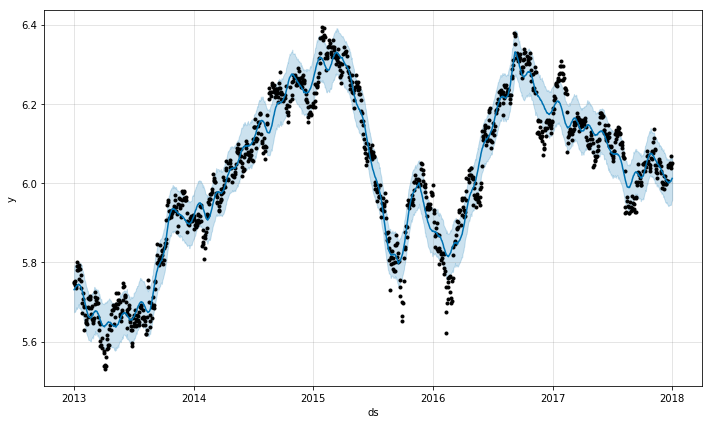

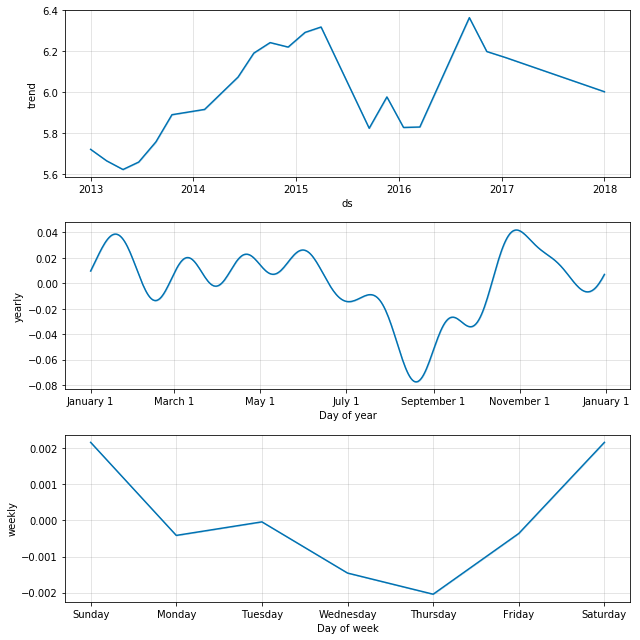

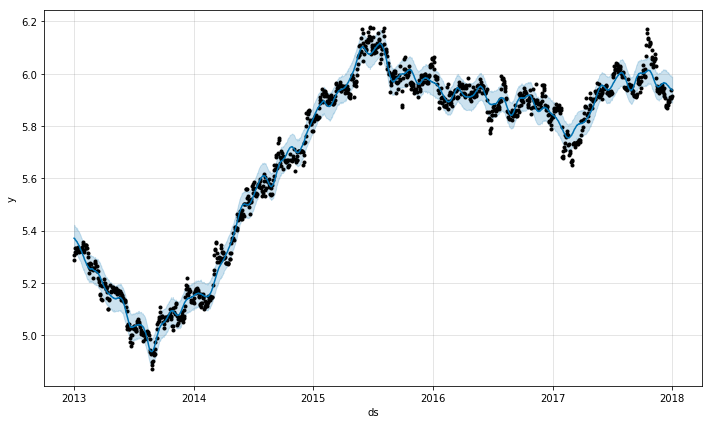

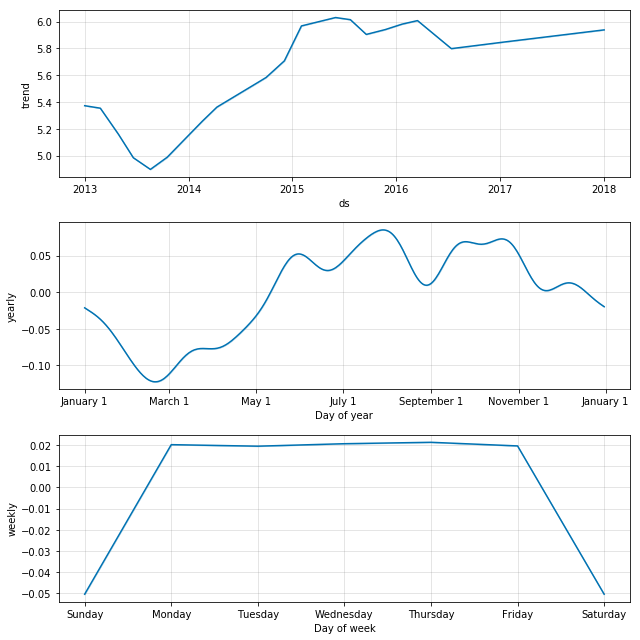

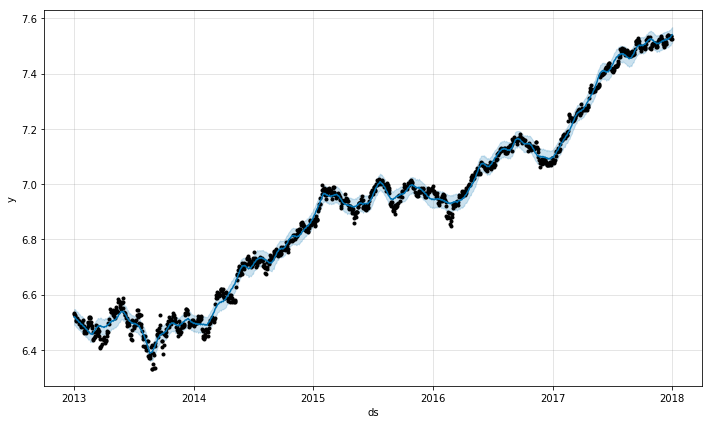

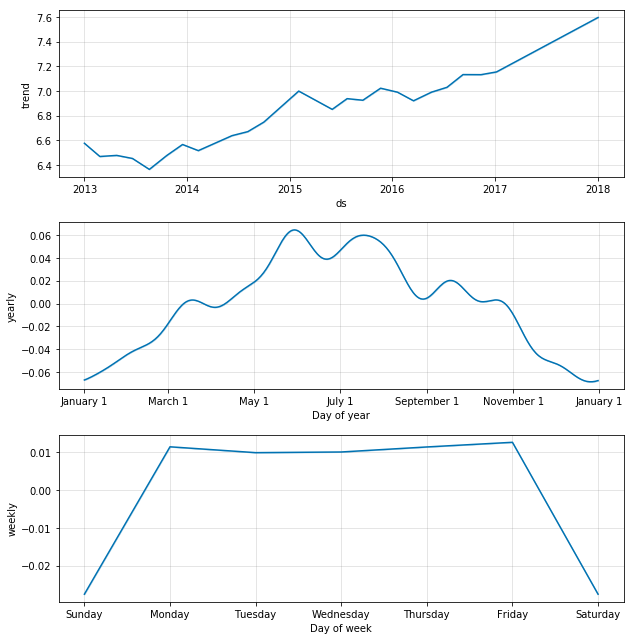

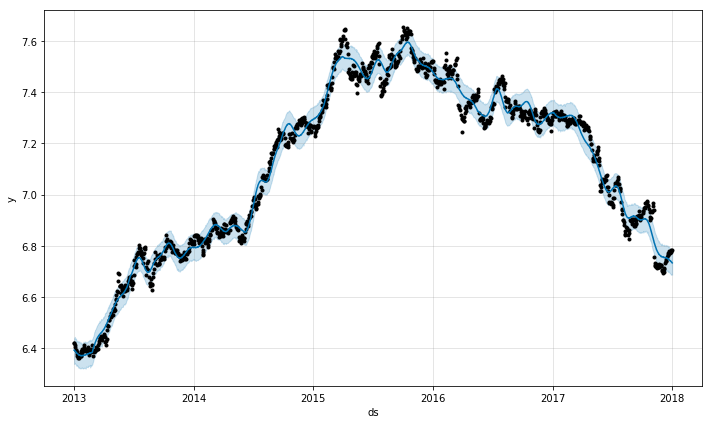

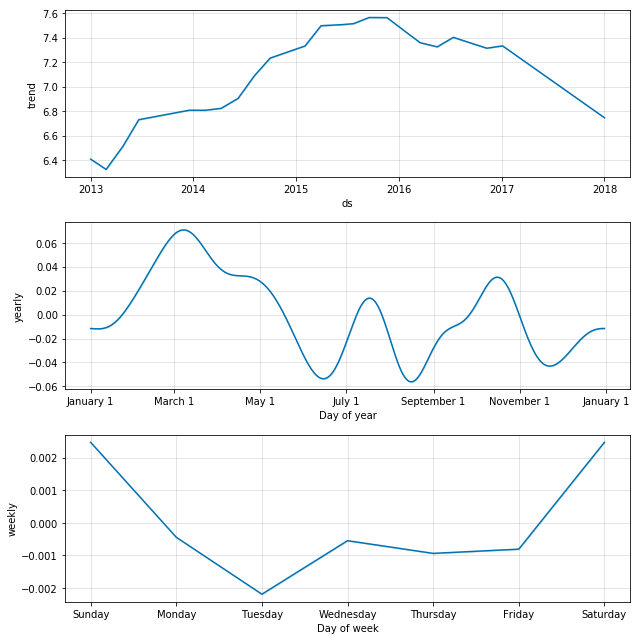

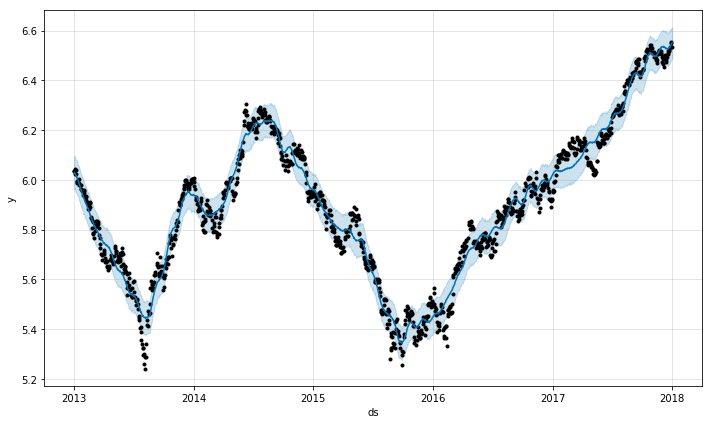

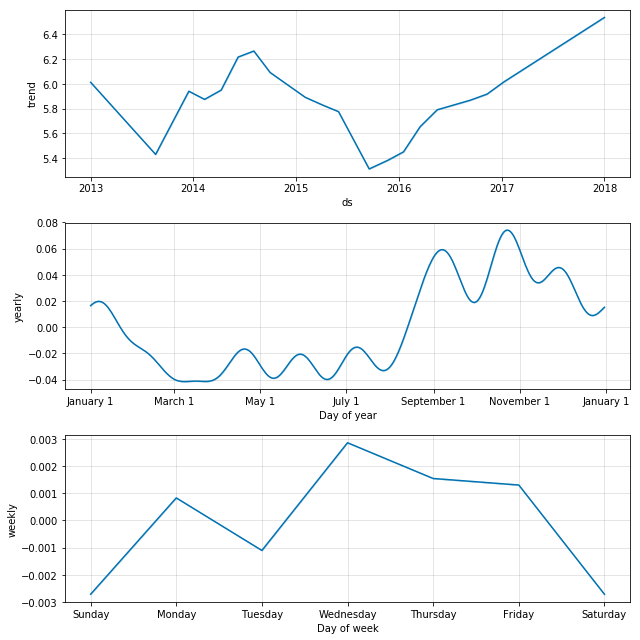

In [89]:
# Creating tuple of stock dataframes
tup_stk_dfs = (stock1_df, stock2_df, stock3_df, stock4_df, stock5_df)

stock1_df, stock2_df, stock3_df, stock4_df, stock5_df = add_vars_to_stock_df(tup_stk_dfs, tickers_for_model)


# EDA, FEATURE SELECTION & MODEL BUILDING FOR STOCK-1

In [90]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  3980485  316.30  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6929286  318.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  6165017  319.06  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  8965650  314.95  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  4943021  315.40  6016.149902  1461.890015  13384.290039    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  53.076375  51.025458  51.025458  57.178208  57.178208   
2013-01-02  53.471593  51.840836  51.840836  56.733106  56.733106   
2013-01-03  52.198263  51.959979  51.959979  52.674832  52.674832   
2013-01-04  43.376478  49.098812  49.098812  31.931811  31.931811   
2013-01-07  31.285208  43.160944  43.160944   7.533735   7.533735   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    313.389008    313.389008  0.000000  0.000000  0.000000  
2013-01-02    314.058504    314.030773  0.027731  0.015406  0.024649  
2013-01-03    314.318247    314.279842  0.038404  0.024831  0.027146  
2013-01-04    313.603200    313.657317 -0.054117 -0.001913 -0.104409  
2013-01-07    312.604116    312.792008 -0.187892 -0.057237 -0.261309  

[5 rows x 54 columns]

In [91]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

### EDA for Stock-1

In [92]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  3980485  316.30  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6929286  318.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  6165017  319.06  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  8965650  314.95  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  4943021  315.40  6016.149902  1461.890015  13384.290039    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  53.076375  51.025458  51.025458  57.178208  57.178208   
2013-01-02  53.471593  51.840836  51.840836  56.733106  56.733106   
2013-01-03  52.198263  51.959979  51.959979  52.674832  52.674832   
2013-01-04  43.376478  49.098812  49.098812  31.931811  31.931811   
2013-01-07  31.285208  43.160944  43.160944   7.533735   7.533735   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    313.389008    313.389008  0.000000  0.000000  0.000000  
2013-01-02    314.058504    314.030773  0.027731  0.015406  0.024649  
2013-01-03    314.318247    314.279842  0.038404  0.024831  0.027146  
2013-01-04    313.603200    313.657317 -0.054117 -0.001913 -0.104409  
2013-01-07    312.604116    312.792008 -0.187892 -0.057237 -0.261309  

[5 rows x 54 columns]

In [93]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

In [94]:
#stock1_df.drop(['ds', 'day_of_week', 'close_-1_s', 'rsv_9', 'kdjk_9', 'kdjd_9', 'kdjj_9', 'close_12_ema', 'close_26_ema'], axis=1, inplace=True)

In [95]:
temp_stock1 = stock1_df[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].copy(deep=True)
temp_stock1.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  312.647003  314.921997  311.161987  313.389008  309.782898   
2013-01-02  315.119995  317.544006  312.894012  314.625000  311.004669   
2013-01-03  316.604004  318.335999  313.783997  314.723999  311.102509   
2013-01-04  315.119995  315.119995  309.876007  312.053009  308.462219   
2013-01-07  314.427002  315.218994  309.282990  309.925995  306.359711   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  3980485  316.30  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6929286  318.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  6165017  319.06  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  8965650  314.95  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  4943021  315.40  6016.149902  1461.890015  13384.290039    ...      

            le_day_of_week        tr       atr      wr_10       kdjk  \
date                                                                   
2013-01-01               3       NaN       NaN  40.770876  53.076375   
2013-01-02               4  4.649994  4.649994  45.737971  53.471593   
2013-01-03               2  4.552002  4.599183  50.348396  52.198263   
2013-01-04               0  5.243988  4.830229  74.267092  43.376478   
2013-01-07               1  5.936004  5.138118  92.897334  31.285208   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-01-01  51.025458  57.178208  0.000000  0.000000  0.000000  
2013-01-02  51.840836  56.733106  0.027731  0.015406  0.024649  
2013-01-03  51.959979  52.674832  0.038404  0.024831  0.027146  
2013-01-04  49.098812  31.931811 -0.054117 -0.001913 -0.104409  
2013-01-07  43.160944   7.533735 -0.187892 -0.057237 -0.261309  

[5 rows x 45 columns]

In [96]:
# Summary statistics of numeric data

temp_stock1.describe().T

count          mean           std           min  \
open                 1233.0  4.196072e+02  8.107131e+01    253.332993   
high                 1233.0  4.251212e+02  8.148116e+01    258.032013   
low                  1233.0  4.133614e+02  8.036846e+01    249.128006   
close                1233.0  4.190373e+02  8.081710e+01    252.492004   
adj close            1233.0  4.182363e+02  8.155594e+01    249.586609   
volume               1233.0  7.386167e+06  5.177051e+06      0.000000   
vwap                 1233.0  4.212396e+02  8.089605e+01    255.940000   
nse                  1233.0  7.846945e+03  1.320167e+03   5285.000000   
spy                  1233.0  2.036067e+03  2.782860e+02   1457.150024   
dj                   1233.0  1.781659e+04  2.398317e+03  13328.849609   
nasdaq               1233.0  4.817514e+03  9.327310e+02   3091.810059   
pcod                 1232.0  6.611127e-01  4.778221e+00    -48.750000   
hld                  1233.0  1.175979e+01  5.221606e+00      0.000000   
rsi                  1214.0  5.081561e+01  1.329772e+01     16.786163   
bbul                 1214.0  4.491621e+02  8.365462e+01    282.606000   
bbll                 1214.0  3.905154e+02  7.731148e+01    241.254000   
stma                 1214.0  4.198387e+02  7.939353e+01    266.229500   
ltma                 1114.0  4.257738e+02  7.002142e+01    286.699433   
ema                  1215.0  4.197450e+02  7.872800e+01    269.541629   
scul                 1233.0  4.866180e-02  2.152473e-01      0.000000   
scll                 1233.0  4.460665e-02  2.065224e-01      0.000000   
stma_cut_ltma_b      1233.0  5.677210e-03  7.516356e-02      0.000000   
stma_cut_ltma_a      1233.0  6.488240e-03  8.032045e-02      0.000000   
close_pr_cut_stma_b  1233.0  6.893755e-02  2.534507e-01      0.000000   
close_pr_cut_stma_a  1233.0  6.812652e-02  2.520651e-01      0.000000   
close_pr_cut_ltma_b  1233.0  2.189781e-02  1.464093e-01      0.000000   
close_pr_cut_ltma_a  1233.0  2.108678e-02  1.437320e-01      0.000000   
dr_stock             1232.0  4.935112e-04  2.182547e-02     -0.098364   
dr_nse               1232.0  4.957585e-04  9.184660e-03     -0.059151   
dr_spy               1232.0  5.189119e-04  7.623811e-03     -0.039414   
dr_dj                1232.0  5.233702e-04  7.347040e-03     -0.035748   
dr_nasdaq            1232.0  6.873394e-04  8.993809e-03     -0.041152   
price_movmnt         1232.0  5.000000e-01  5.002030e-01      0.000000   
beta                 1233.0  1.221338e+00  9.763426e+01   -944.000000   
ts_close_pr          1233.0  4.184889e+02  7.793062e+01    280.518435   
le_day_of_week       1233.0  2.021898e+00  1.412608e+00      0.000000   
tr                   1232.0  1.273841e+01  6.194923e+00      0.000000   
atr                  1232.0  1.271228e+01  2.452204e+00      4.599183   
wr_10                1233.0  4.852116e+01  2.930446e+01      1.845476   
kdjk                 1233.0  5.127675e+01  2.233766e+01      9.146519   
kdjd                 1233.0  5.122920e+01  1.940039e+01     12.947289   
kdjj                 1233.0  5.137186e+01  3.506323e+01    -16.982867   
macd                 1233.0  5.914265e-01  9.285172e+00    -23.134605   
macds                1233.0  5.909360e-01  8.716136e+00    -20.645520   
macdh                1233.0  9.808823e-04  5.725559e+00    -22.046034   

                              25%           50%           75%           max  
open                 3.660730e+02  4.220000e+02  4.800000e+02  6.002120e+02  
high                 3.701300e+02  4.264000e+02  4.843500e+02  6.059010e+02  
low                  3.605000e+02  4.170000e+02  4.720370e+02  5.898730e+02  
close                3.657770e+02  4.218000e+02  4.788140e+02  5.981340e+02  
adj close            3.641051e+02  4.214000e+02  4.787500e+02  5.978918e+02  
volume               4.813221e+06  6.417376e+06  8.606005e+06  1.107443e+08  
vwap                 3.682000e+02  4.232000e+02  4.816100e+02  6.047300e+02  
nse                  6.641750e+03  8.05

In [97]:
temp_stock1.isnull().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
tr                       1
a

In [98]:
temp_stock1['ltma'].head(130)

date
2013-01-01           NaN
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
2013-01-09           NaN
2013-01-10           NaN
2013-01-11           NaN
2013-01-14           NaN
2013-01-15           NaN
2013-01-16           NaN
2013-01-17           NaN
2013-01-18           NaN
2013-01-21           NaN
2013-01-22           NaN
2013-01-23           NaN
2013-01-24           NaN
2013-01-25           NaN
2013-01-28           NaN
2013-01-29           NaN
2013-01-30           NaN
2013-01-31           NaN
2013-02-01           NaN
2013-02-04           NaN
2013-02-05           NaN
2013-02-06           NaN
2013-02-07           NaN
2013-02-08           NaN
2013-02-11           NaN
                 ...    
2013-05-28           NaN
2013-05-29           NaN
2013-05-30           NaN
2013-05-31           NaN
2013-06-03           NaN
2013-06-04           NaN
2013-06-05           NaN
2013-06-06           NaN
2013-06-07          

In [99]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

temp_stock1 = temp_stock1.iloc[120:]

In [100]:
temp_stock1['ltma'].head()

date
2013-06-25    292.423450
2013-06-26    292.049550
2013-06-27    291.655450
2013-06-28    291.374300
2013-07-01    291.180958
Name: ltma, dtype: float64

In [101]:
temp_stock1.isnull().sum()

open                   0
high                   0
low                    0
close                  0
adj close              0
volume                 0
vwap                   0
nse                    0
spy                    0
dj                     0
nasdaq                 0
pcod                   0
hld                    0
rsi                    0
bbul                   0
bbll                   0
stma                   0
ltma                   0
ema                    0
scul                   0
scll                   0
stma_cut_ltma_b        0
stma_cut_ltma_a        0
close_pr_cut_stma_b    0
close_pr_cut_stma_a    0
close_pr_cut_ltma_b    0
close_pr_cut_ltma_a    0
dr_stock               0
dr_nse                 0
dr_spy                 0
dr_dj                  0
dr_nasdaq              0
price_movmnt           0
beta                   0
ts_close_pr            0
le_day_of_week         0
tr                     0
atr                    0
wr_10                  0
kdjk                   0


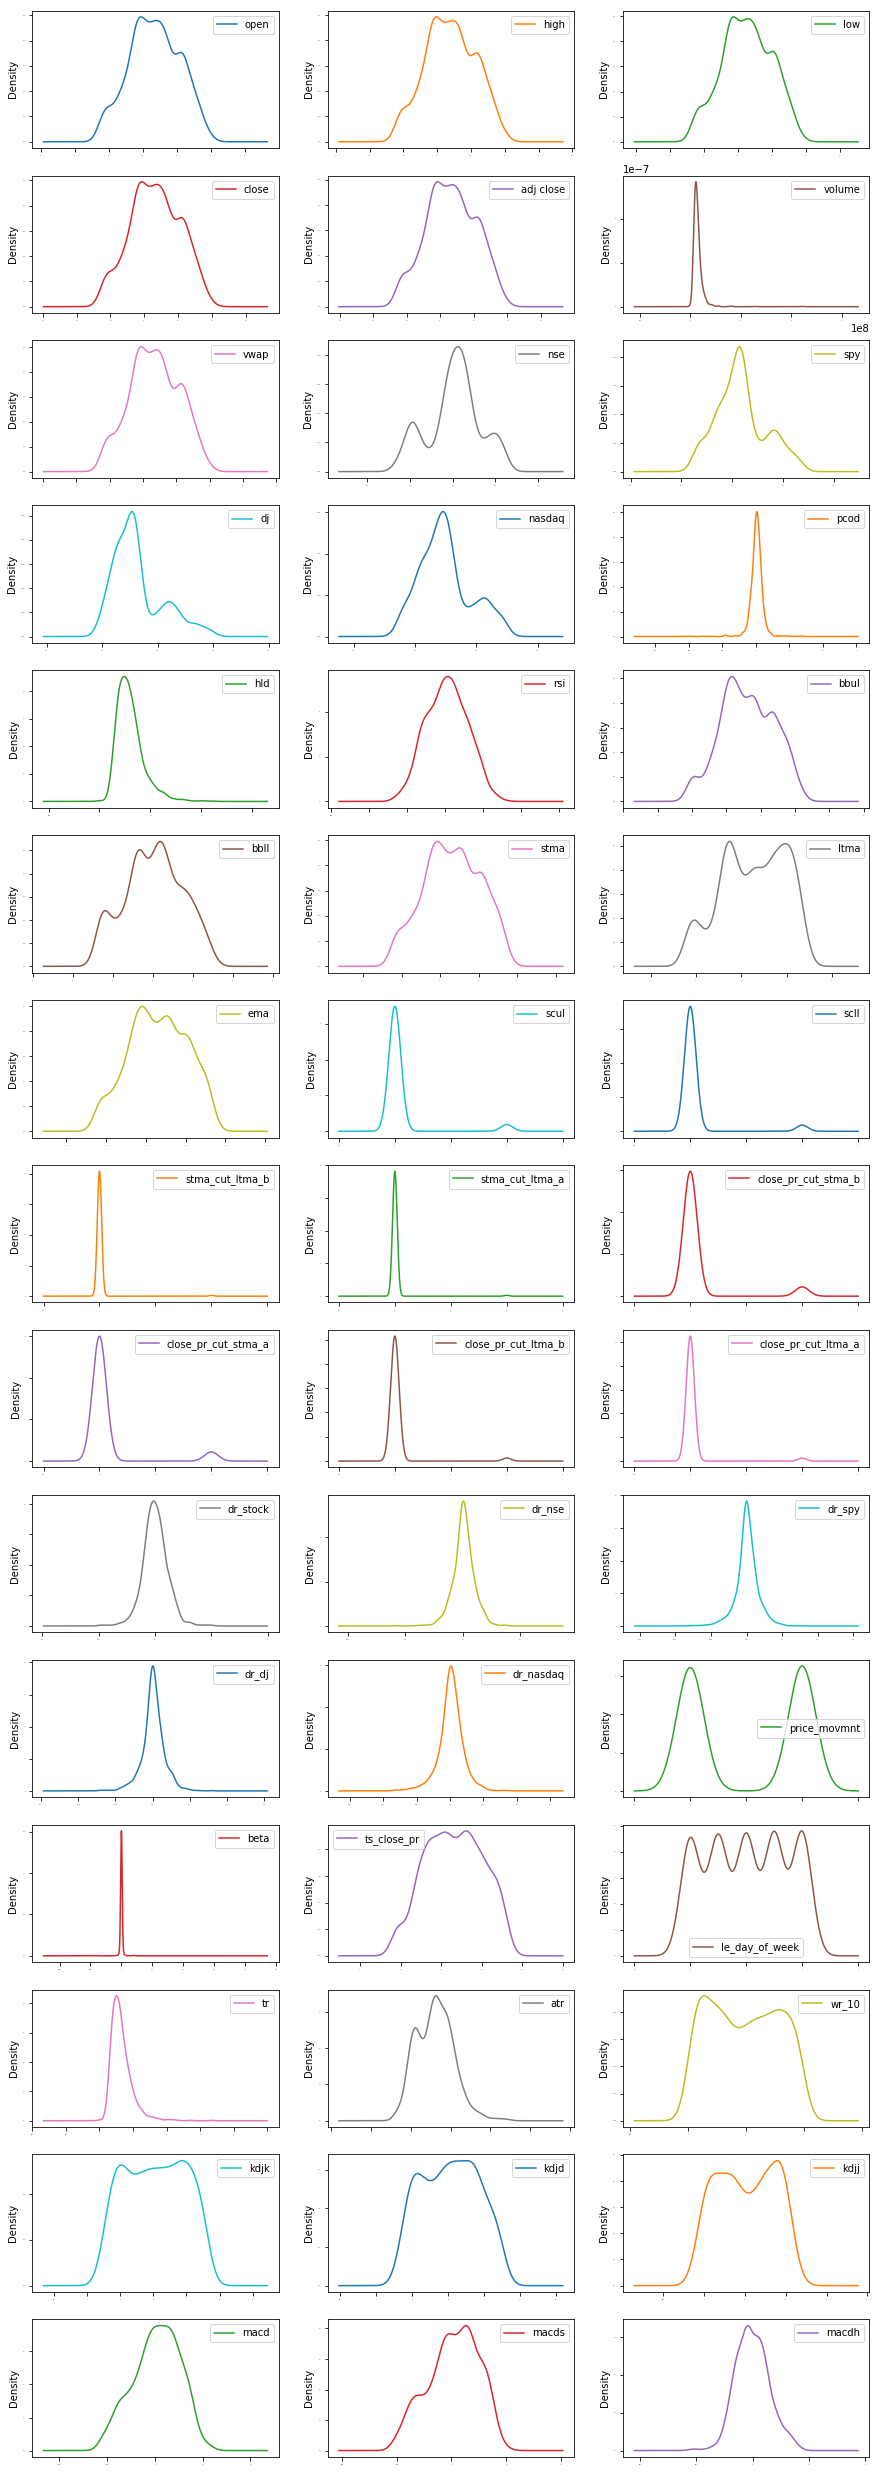

In [102]:
# density plots

temp_stock1.plot(kind='density', subplots=True, layout=(15,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()


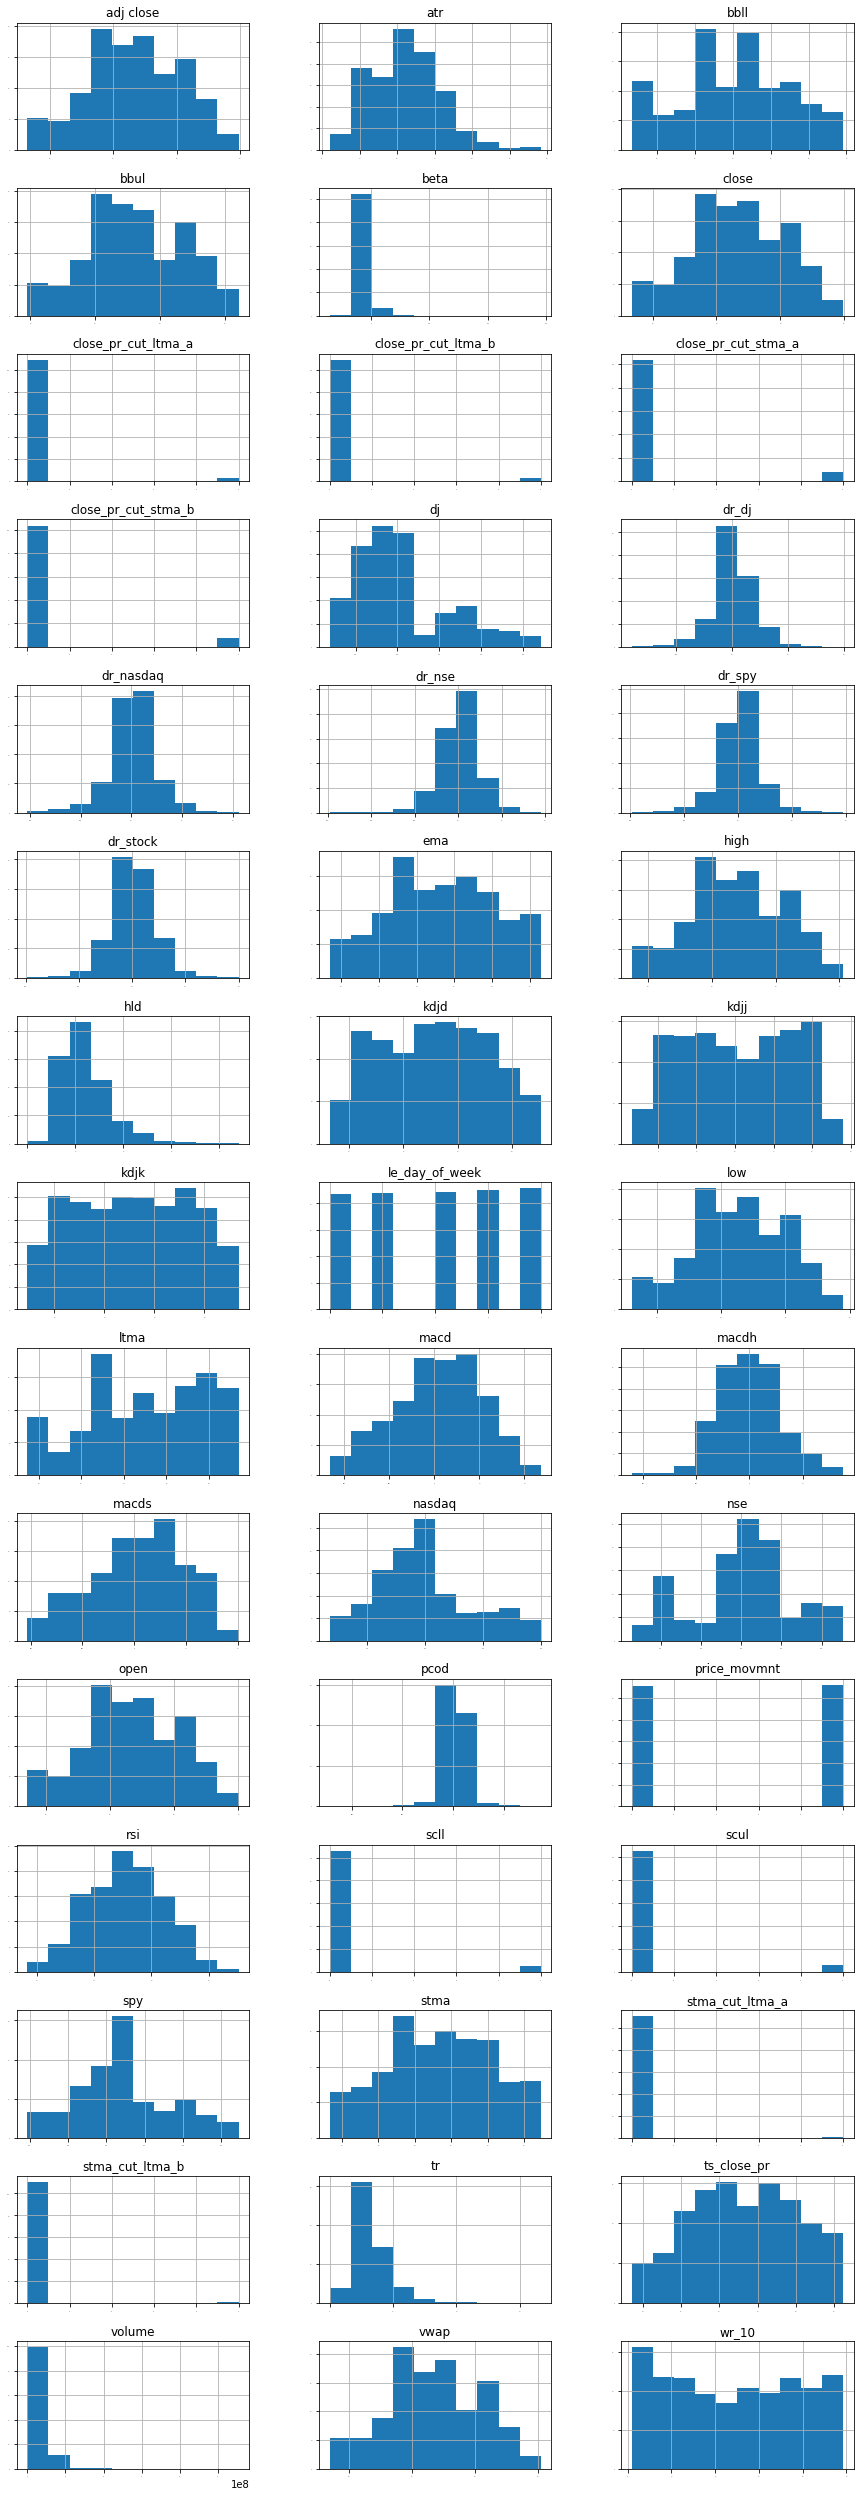

In [103]:
# histograms

temp_stock1.hist(layout=(15,3), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,45))
plt.show()


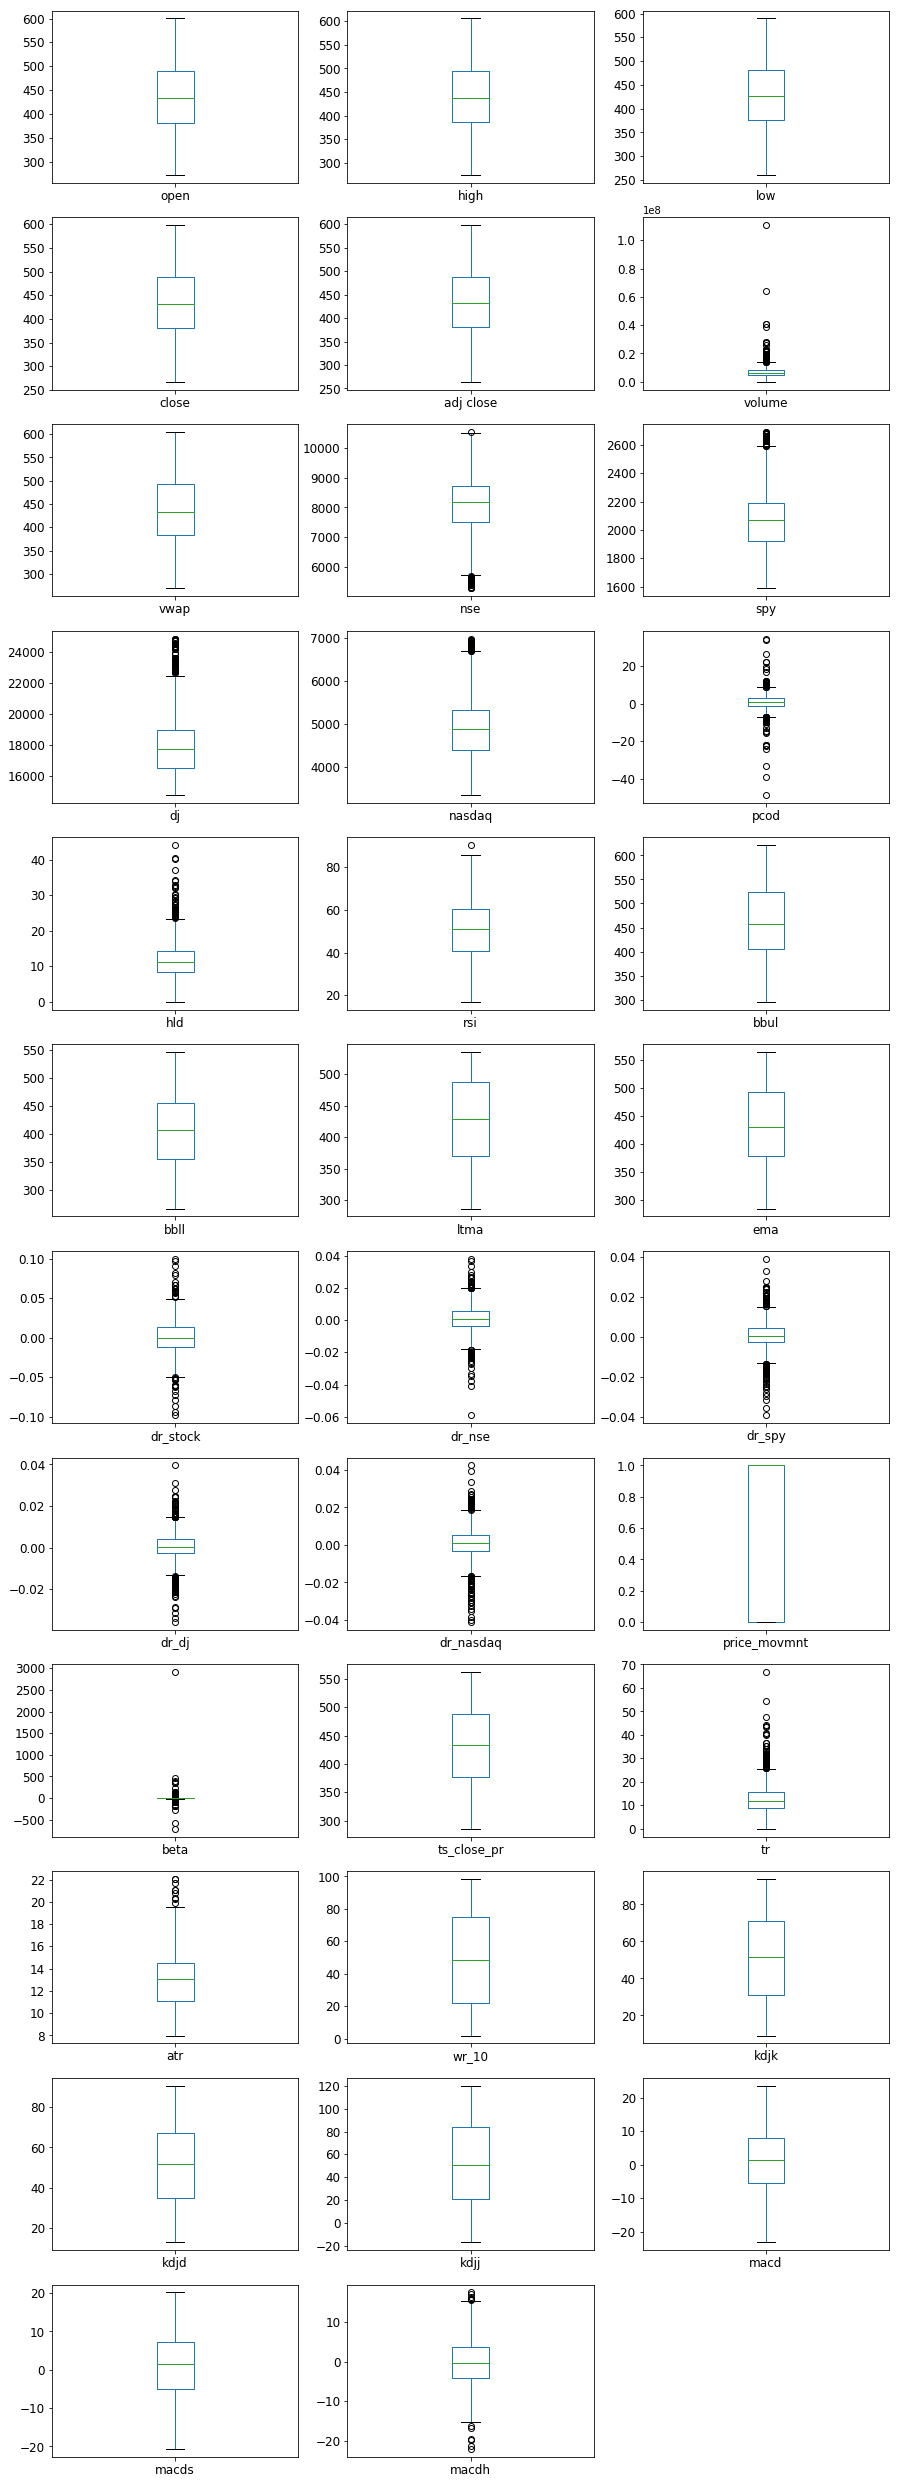

In [104]:
# Box and whisker plots

temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()


In [105]:
temp_stock1['scul'].value_counts()

0    1056
1      57
Name: scul, dtype: int64

In [106]:
temp_stock1['scll'].value_counts()

0    1061
1      52
Name: scll, dtype: int64

In [107]:
temp_stock1['stma_cut_ltma_b'].value_counts()

0    1106
1       7
Name: stma_cut_ltma_b, dtype: int64

In [108]:
temp_stock1['stma_cut_ltma_a'].value_counts()

0    1105
1       8
Name: stma_cut_ltma_a, dtype: int64

In [109]:
temp_stock1['close_pr_cut_stma_b'].value_counts()

0    1036
1      77
Name: close_pr_cut_stma_b, dtype: int64

In [110]:
temp_stock1['close_pr_cut_stma_a'].value_counts()

0    1037
1      76
Name: close_pr_cut_stma_a, dtype: int64

In [111]:
temp_stock1['close_pr_cut_ltma_b'].value_counts()

0    1086
1      27
Name: close_pr_cut_ltma_b, dtype: int64

In [112]:
temp_stock1['close_pr_cut_ltma_a'].value_counts()

0    1087
1      26
Name: close_pr_cut_ltma_a, dtype: int64

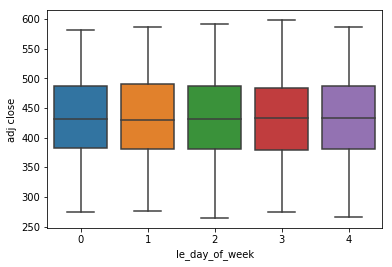

In [113]:
sns.boxplot(x="le_day_of_week", y="adj close", data=temp_stock1)

In [114]:
temp_stock1['price_movmnt'].value_counts()

1.0    560
0.0    553
Name: price_movmnt, dtype: int64

In [115]:
temp1 = temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = temp_stock1[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = temp_stock1[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = temp_stock1[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = temp_stock1[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = temp_stock1[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = temp_stock1[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

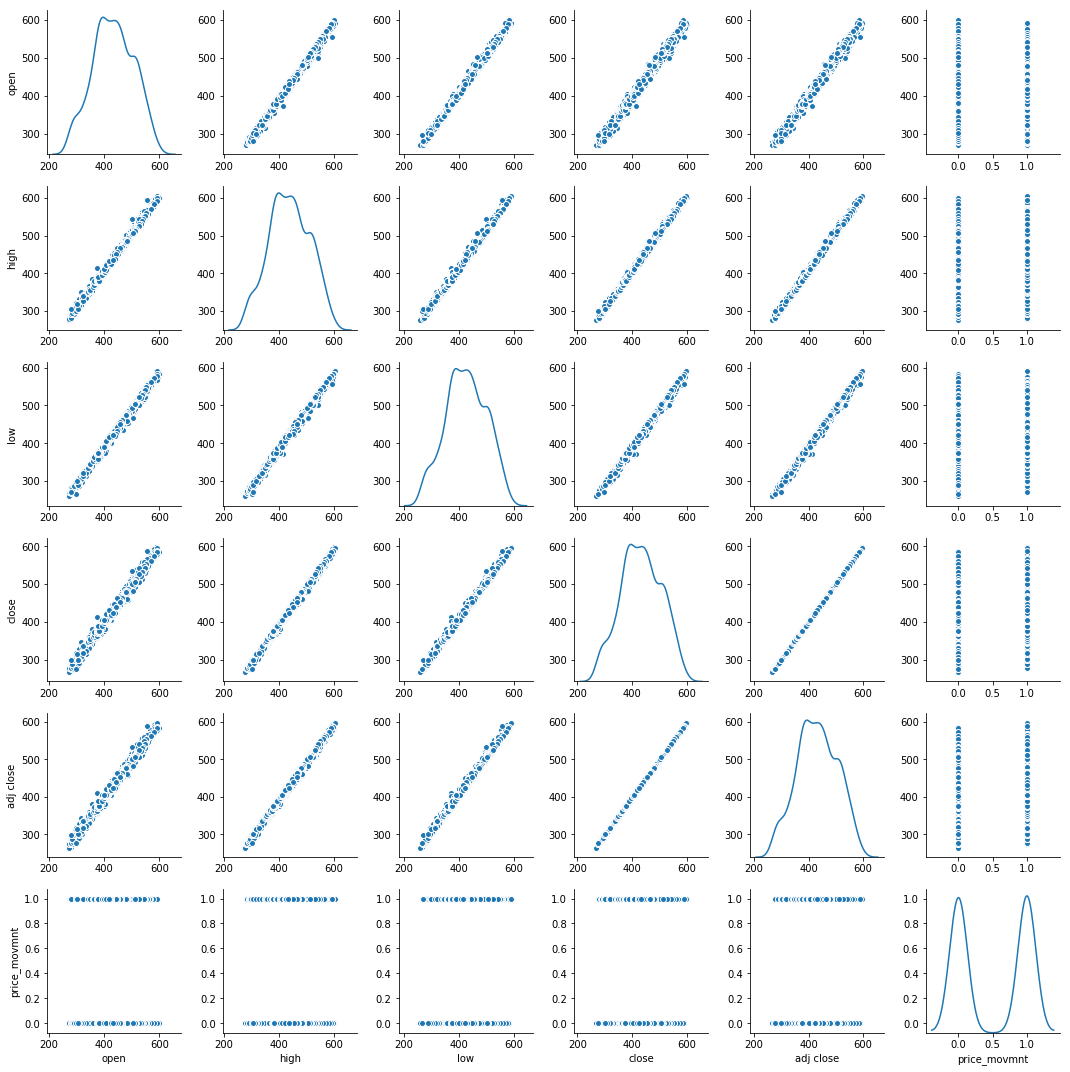

In [116]:
sns.pairplot(temp1, diag_kind='kde')

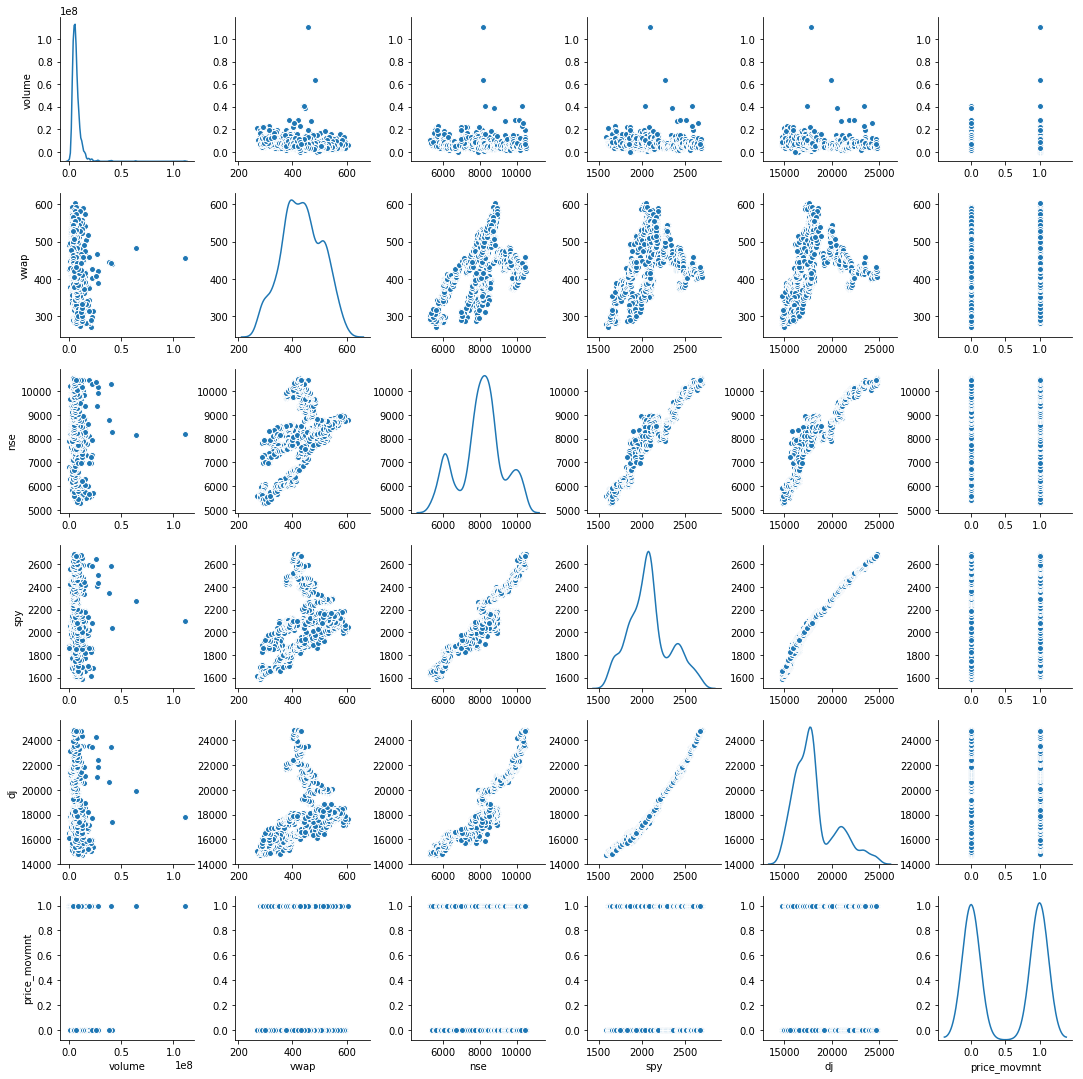

In [117]:
sns.pairplot(temp2, diag_kind='kde')

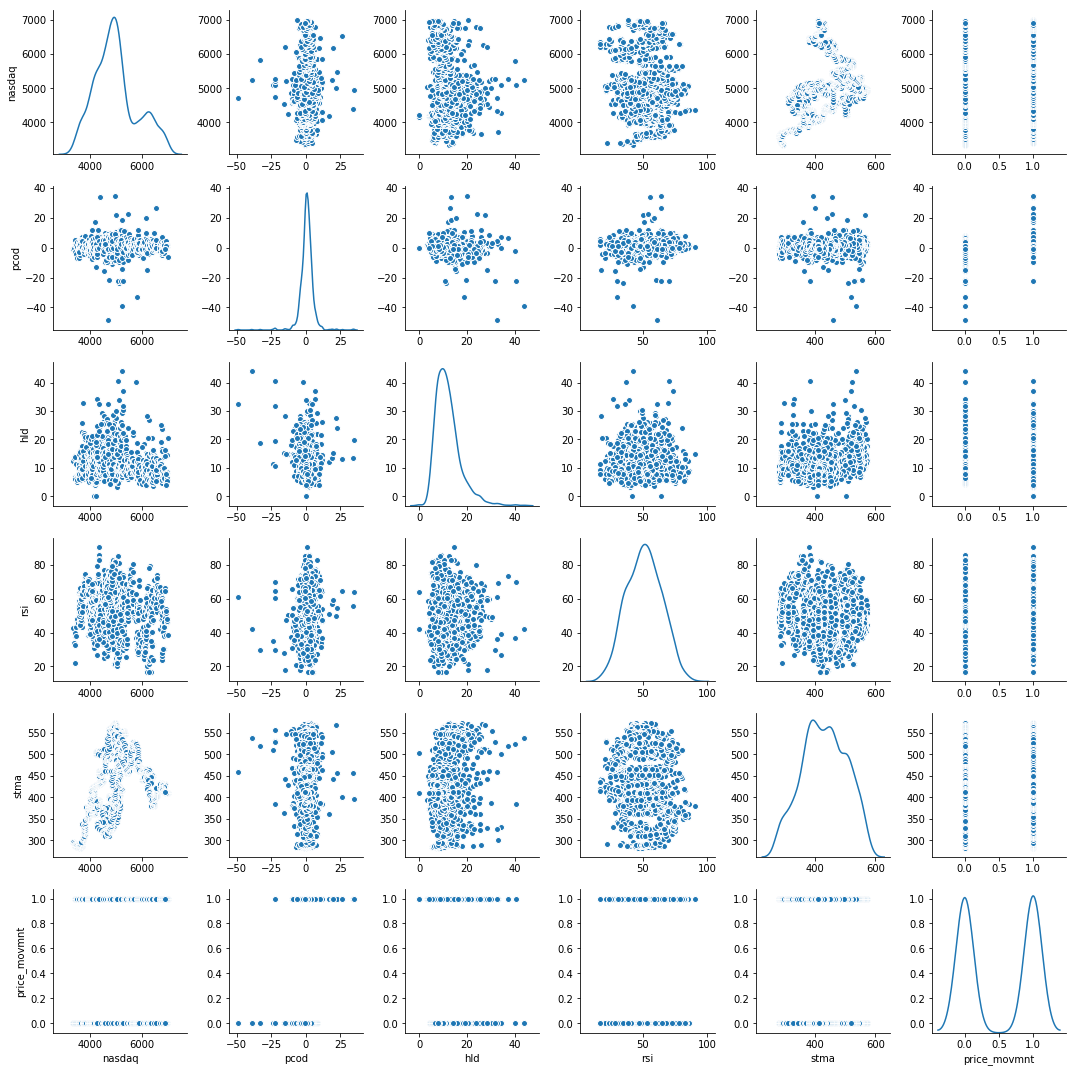

In [118]:
sns.pairplot(temp3, diag_kind='kde')

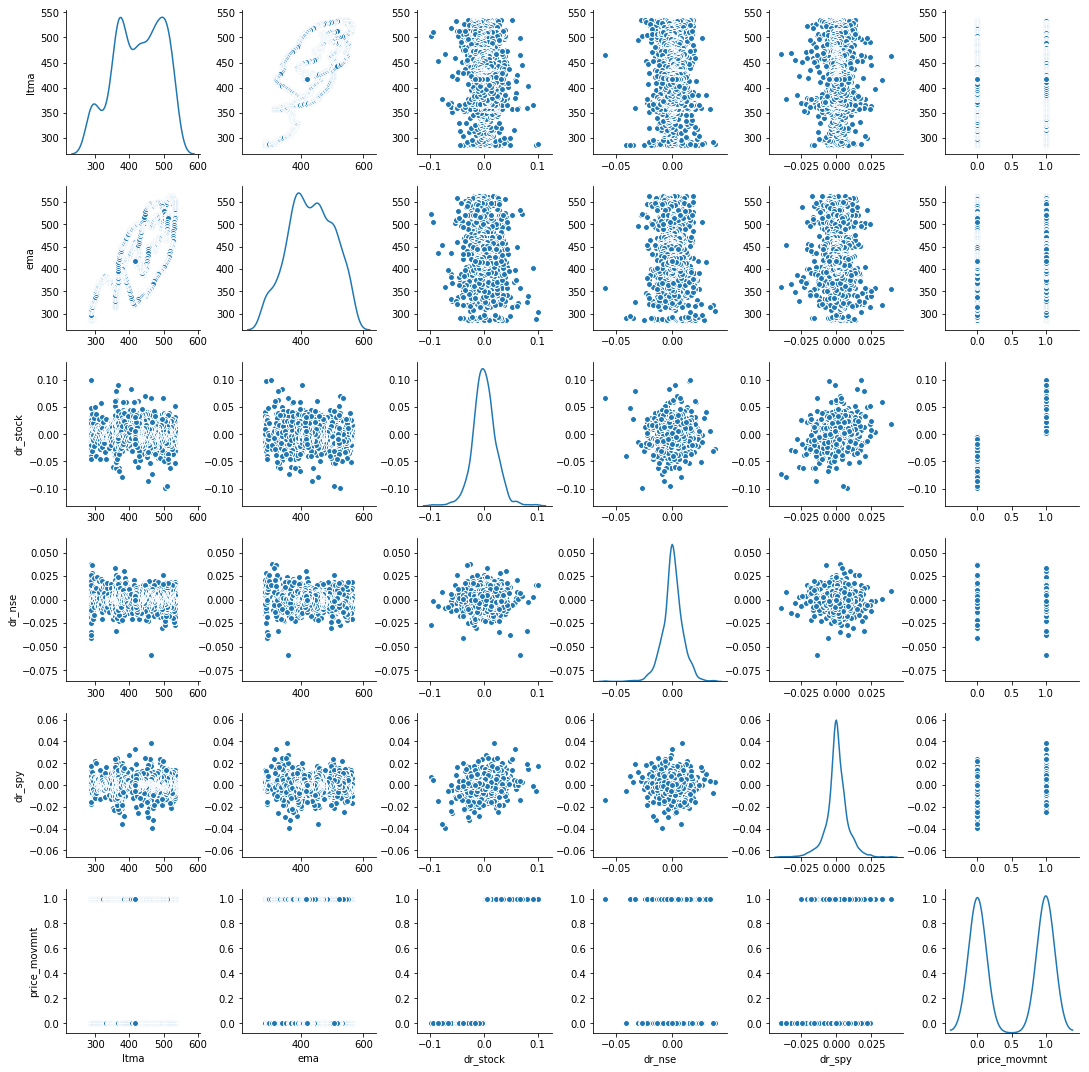

In [119]:
sns.pairplot(temp4, diag_kind='kde')

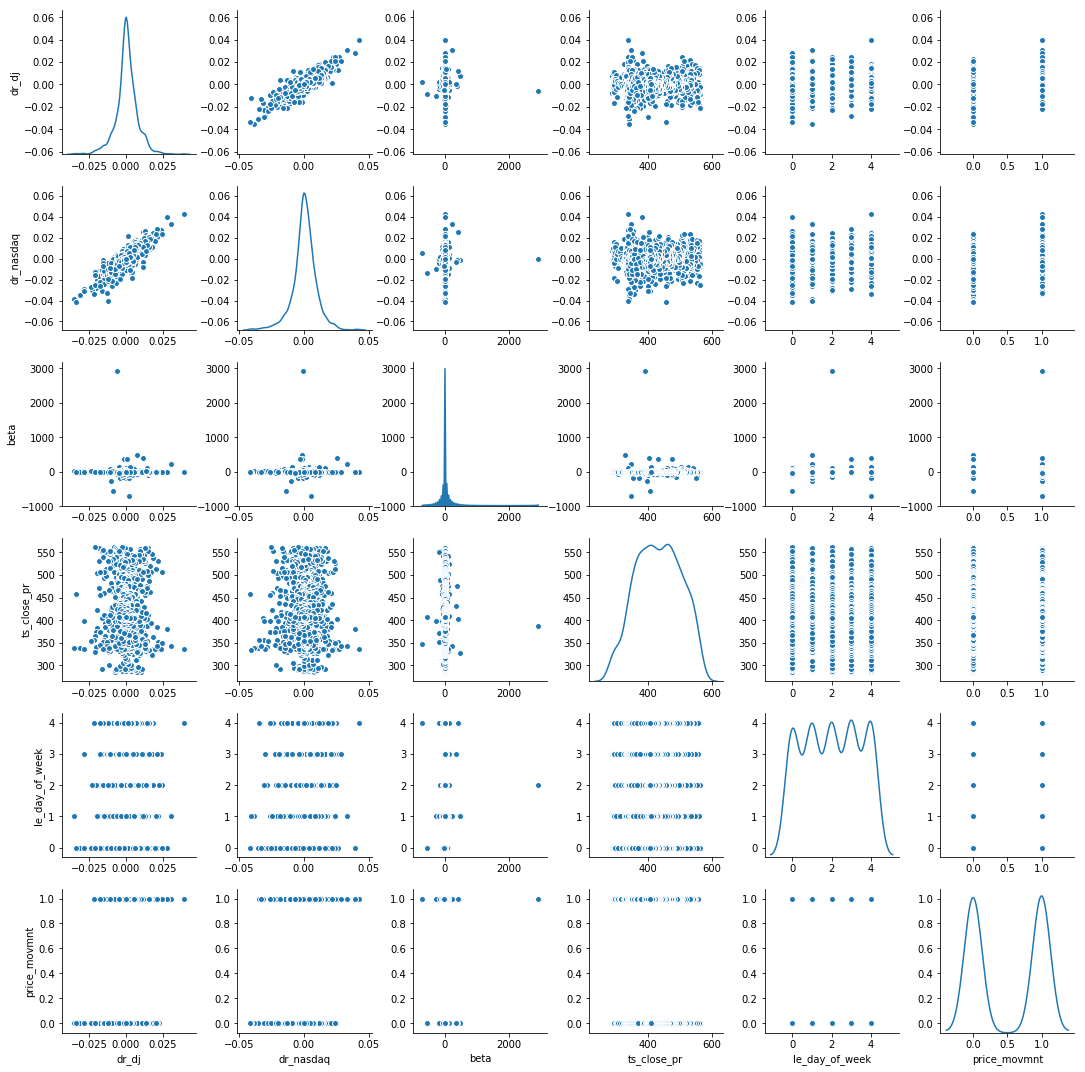

In [120]:
sns.pairplot(temp5, diag_kind='kde')

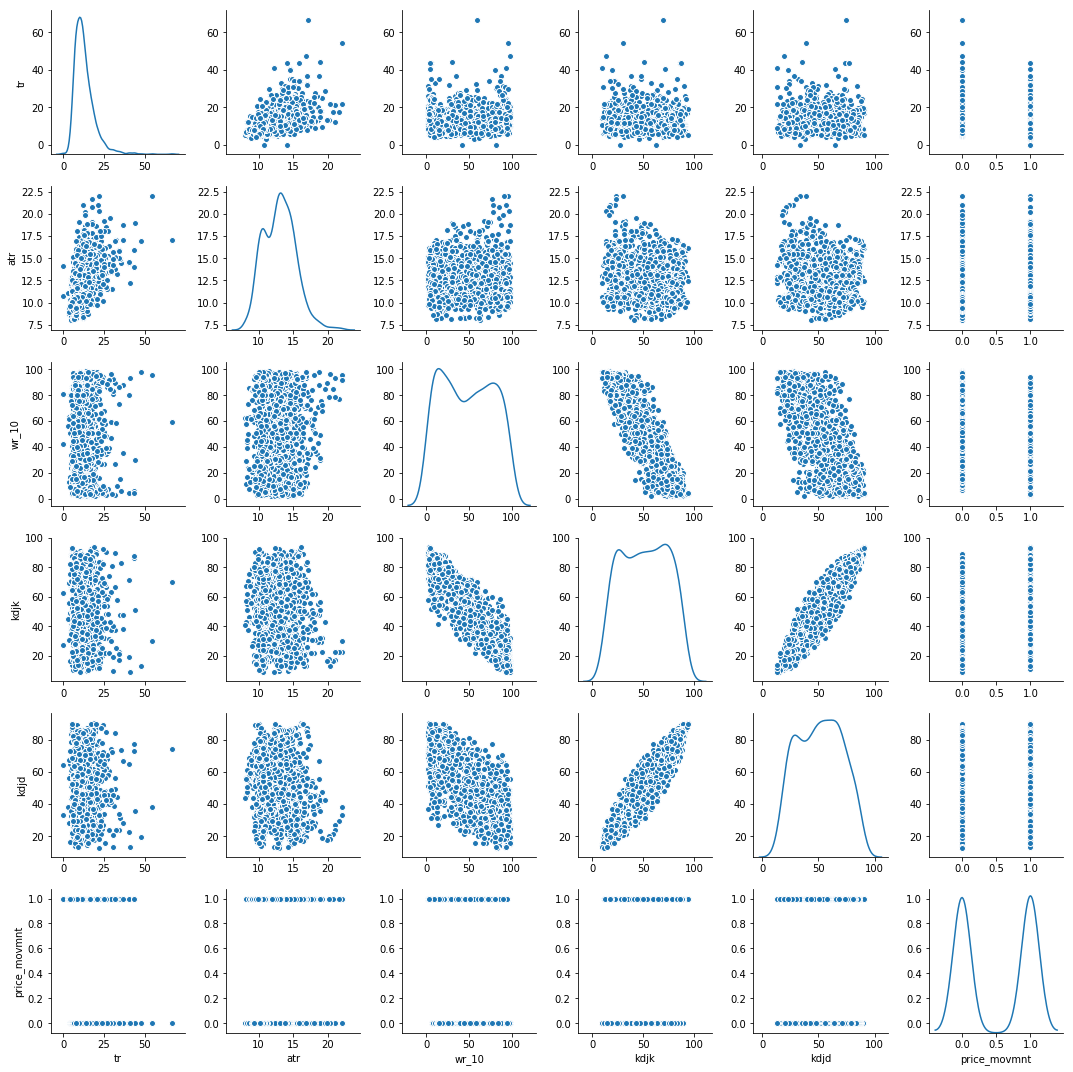

In [121]:
sns.pairplot(temp6, diag_kind='kde')

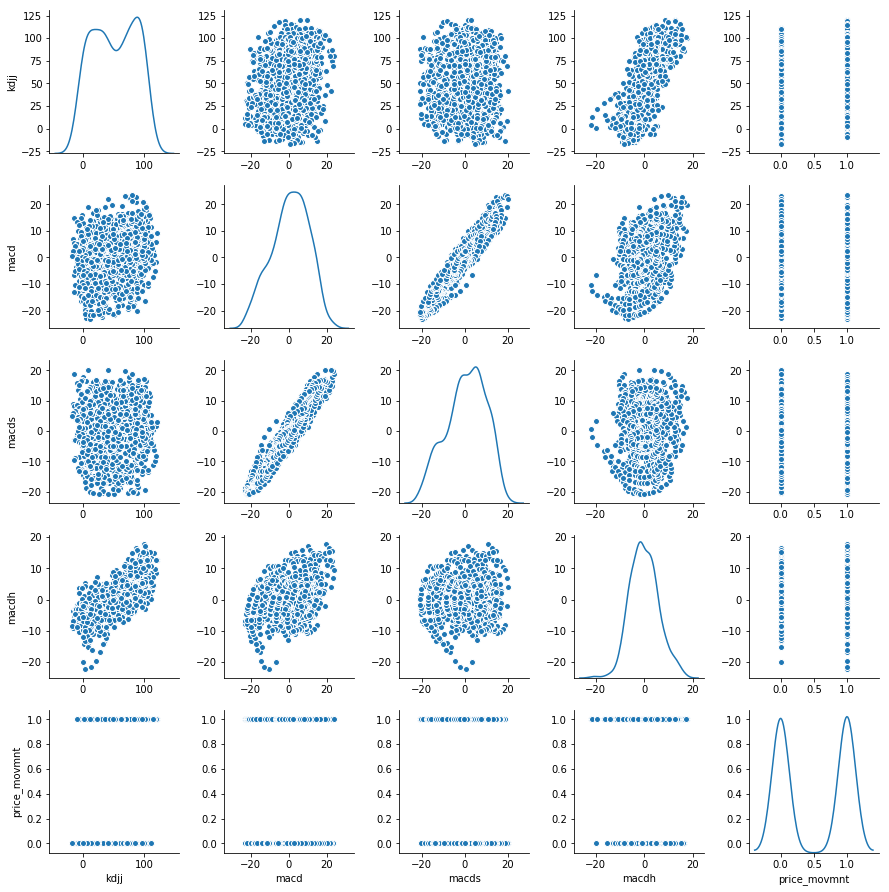

In [122]:
sns.pairplot(temp7, diag_kind='kde')

In [123]:
temp_stock1.head()

open        high         low       close   adj close  \
date                                                                     
2013-06-25  280.243988  281.727997  269.212006  278.463013  275.258759   
2013-06-26  278.018005  279.748993  266.294006  269.756989  266.652924   
2013-06-27  271.635986  274.506012  260.308014  267.432007  264.354706   
2013-06-28  272.279999  279.006989  272.279999  278.315002  275.112457   
2013-07-01  275.049988  287.960999  274.059998  286.725006  283.425720   

              volume    vwap          nse          spy            dj  \
date                                                                   
2013-06-25  12782946  279.43  5590.250000  1588.030029  14760.309570   
2013-06-26  10490521  273.09  5609.100098  1603.260010  14910.139648   
2013-06-27  21327052  269.04  5588.700195  1613.199951  15024.490234   
2013-06-28   8200859  280.00  5682.350098  1606.280029  14909.599609   
2013-07-01   7853378  286.57  5842.200195  1614.959961  14974.959961   

              ...     le_day_of_week         tr        atr      wr_10  \
date          ...                                                       
2013-06-25    ...                  3  12.515991   9.644847  67.192682   
2013-06-26    ...                  4  13.454987   9.917035  88.870731   
2013-06-27    ...                  2  14.197998  10.222854  80.798892   
2013-06-28    ...                  0  11.574982  10.319445  51.466247   
2013-07-01    ...                  1  13.901001  10.575297  26.647946   

                 kdjk       kdjd       kdjj      macd     macds     macdh  
date                                                                       
2013-06-25  32.480596  36.031684  25.378419 -3.093208 -0.932388 -4.321640  
2013-06-26  25.363487  32.475619  11.139224 -4.312393 -1.608389 -5.408008  
2013-06-27  23.309360  29.420199  11.087683 -5.403905 -2.367492 -6.072825  
2013-06-28  32.206240  30.348879  35.920961 -5.329392 -2.959872 -4.739040  
2013-07-01  48.730431  36.476063  73.239166 -4.539437 -3.275785 -2.527303  

[5 rows x 45 columns]

In [124]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

In [125]:
temp_stock1[['pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul', 'scll']].head(50)

pcod        hld        rsi     bbul     bbll        stma  \
date                                                                       
2013-06-25 -0.643005  12.515991  42.411223  315.893  274.079  294.985899   
2013-06-26 -0.445008  13.454987  33.665487  316.994  269.896  293.444949   
2013-06-27  1.878997  14.197998  22.321180  315.386  266.879  291.132300   
2013-06-28  4.847992   6.726990  32.551865  312.734  266.365  289.549300   
2013-07-01 -3.265014  13.901001  37.808203  309.298  267.402  288.349699   
2013-07-02 -2.770996   6.184021  39.641330  307.270  267.486  287.377600   
2013-07-03 -4.253998  11.476990  37.956217  304.669  267.800  286.234850   
2013-07-04  1.781006  11.377991  43.036859  302.171  268.874  285.522499   
2013-07-05  3.661011   5.144013  47.219783  301.123  269.358  285.240549   
2013-07-08 -7.222992   7.124023  46.073552  300.300  269.365  284.832449   
2013-07-09  0.691986   5.739013  48.042566  299.918  269.346  284.632100   
2013-07-10 -1.385010   7.617981  45.606023  299.274  269.050  284.162151   
2013-07-11  3.610992   8.756012  50.991728  299.282  269.236  284.258652   
2013-07-12  0.295990   9.102997  47.665769  298.623  269.469  284.045952   
2013-07-15 -1.682007   5.688995  44.117746  296.924  270.080  283.501802   
2013-07-16 -4.403016  10.536987  46.807266  295.841  270.564  283.202503   
2013-07-17 -0.889984   8.657013  46.415609  295.208  270.519  282.863652   
2013-07-18 -0.643005   7.272003  49.014036  295.055  270.489  282.772102   
2013-07-19  0.098999  10.487976  53.803666  296.036  270.261  283.148053   
2013-07-22 -0.643005   7.420990  56.978603  297.660  270.016  283.838153   
2013-07-23  0.346009   7.172974  58.811743  299.227  270.166  284.696452   
2013-07-24 -0.790985   6.183014  63.521544  299.208  272.624  285.915852   
2013-07-25  0.693024   8.459015  66.192255  298.348  276.413  287.380103   
2013-07-26  1.088990  14.197998  54.786876  297.921  277.695  287.808002   
2013-07-29 -1.928986   8.903992  53.393748  298.423  277.782  288.102301   
2013-07-30  0.197998  15.187011  49.185767  298.514  277.537  288.025652   
2013-07-31 -2.375000  14.346008  53.198018  298.329  278.346  288.337302   
2013-08-01  0.990021   9.399018  48.178523  298.213  278.131  288.171602   
2013-08-02 -1.138001   9.546997  46.789324  297.664  278.110  287.887152   
2013-08-05 -0.197998  22.558013  48.243794  297.806  277.666  287.736252   
2013-08-06 -0.296997   8.410004  49.122490  297.807  277.512  287.659550   
2013-08-07 -3.412995  14.791016  47.199071  298.467  276.342  287.404750   
2013-08-08  6.529999  17.809021  46.655133  299.091  275.115  287.102949   
2013-08-12  3.165986   7.074005  43.495770  299.102  273.996  286.548900   
2013-08-13 -0.395996  17.759003  51.309803  299.219  274.116  286.667599   
2013-08-14  7.321991  25.921997  61.799181  306.105  269.956  288.030499   
2013-08-16 -1.582977  11.921997  62.413561  309.907  268.993  289.450250   
2013-08-19 -6.678009  11.229004  55.863806  310.843  269.521  290.182399   
2013-08-20 -4.649994  12.664002  47.465882  310.634  269.068  289.850949   
2013-08-21  2.819977  15.880005  44.573306  310.202  268.066  289.133649   
2013-08-22  0.643005  10.783997  47.575293  309.640  267.950  288.794798   
2013-08-23  3.016998  10.389007  51.226829  310.076  267.874  288.975349   
2013-08-26  0.543976  10.686004  49.396267  309.865  267.908  288.886349   
2013-08-27 -3.068024   7.668000  50.034012  309.868  267.915  288.891299   
2013-08-28  0.000000  13.059998  50.737392  310.080  267.920  289.000149   
2013-08-29  1.533997  13.555023  57.206266  311.698  268.390  290.043948   
2013-08-30  2.028015  15.039001  52.965035  312.256  268.698  290.476799   
2013-09-02 -3.214996   9.844024  53.670163  312.835  269.182  291.008598   
2013-09-03  2.275024  15.532990  52.341838  313.150  269.550  291.349898   
2013-09-04  4.997010  13.356018  58.640425  315.253  270.113  292.683098   

                  ltma         ema  scul  scll  
date          

In [126]:
temp_stock1[['stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].head(50)

stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                1                    0   
2013-06-28                0                0                    0   
2013-07-01                0                0                    0   
2013-07-02                0                0                    0   
2013-07-03                0                0                    0   
2013-07-04                0                0                    1   
2013-07-05                0                0                    0   
2013-07-08                0                0                    0   
2013-07-09                0                0                    1   
2013-07-10                0                0                    0   
2013-07-11                0                0                    0   
2013-07-12                0                0                    1   
2013-07-15                0                0                    0   
2013-07-16                0                0                    0   
2013-07-17                0                0                    0   
2013-07-18                0                0                    1   
2013-07-19                0                0                    0   
2013-07-22                0                0                    0   
2013-07-23                0                0                    0   
2013-07-24                0                0                    0   
2013-07-25                1                0                    0   
2013-07-26                0                0                    0   
2013-07-29                0                0                    1   
2013-07-30                0                0                    0   
2013-07-31                0                0                    0   
2013-08-01                0                0                    0   
2013-08-02                0                0                    0   
2013-08-05                0                0                    0   
2013-08-06                0                0                    0   
2013-08-07                0                0                    0   
2013-08-08                0                0                    0   
2013-08-12                0                1                    0   
2013-08-13                0                0                    1   
2013-08-14                1                0                    0   
2013-08-16                0                0                    0   
2013-08-19                0                0                    0   
2013-08-20                0                0                    0   
2013-08-21                0                0                    0   
2013-08-22                0                0                    1   
2013-08-23                0                0                    0   
2013-08-26                0                0                    0   
2013-08-27                0                0                    0   
2013-08-28                0                0                    1   
2013-08-29                0                0                    0   
2013-08-30                0                0                    0   
2013-09-02                0                0                    0   
2013-09-03                0                0                    0   
2013-09-04                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  
date                                                                       
2013-06-25                    0                    0                    0  
2013-06-26                    0                    0                    0  
2013-06-27                    0                    0                    0  
2013-06-28                    0            

In [127]:
temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr']].head(50)

dr_stock    dr_nse    dr_spy     dr_dj  dr_nasdaq  price_movmnt  \
date                                                                          
2013-06-25 -0.008630 -0.013656  0.009497  0.006873   0.008170           0.0   
2013-06-26 -0.031265  0.003372  0.009590  0.010151   0.008462           0.0   
2013-06-27 -0.008619 -0.003637  0.006200  0.007669   0.007594           0.0   
2013-06-28  0.040694  0.016757 -0.004290 -0.007647   0.000409           1.0   
2013-07-01  0.030218  0.028131  0.005404  0.004384   0.009179           1.0   
2013-07-02 -0.011562  0.009697 -0.000545 -0.002841  -0.000317           0.0   
2013-07-03 -0.007854 -0.007001  0.000824  0.003748   0.002991           0.0   
2013-07-04  0.028501 -0.014793  0.000000  0.000000   0.000000           1.0   
2013-07-05  0.013344  0.011445  0.010202  0.009839   0.010370           1.0   
2013-07-08 -0.028360  0.005302  0.005252  0.005870   0.001566           0.0   
2013-07-09  0.004516 -0.009603  0.007230  0.004969   0.005576           1.0   
2013-07-10 -0.017467  0.008165  0.000182 -0.000567   0.004709           0.0   
2013-07-11  0.002993 -0.007220  0.013554  0.011069   0.016343           1.0   
2013-07-12  0.026675  0.020355  0.003086  0.000219   0.006087           1.0   
2013-07-15 -0.013846  0.012451  0.001375  0.001291   0.002058           0.0   
2013-07-16  0.010747  0.003628 -0.003709 -0.002093  -0.002492           1.0   
2013-07-17 -0.021608 -0.012527  0.002774  0.001208   0.003196           0.0   
2013-07-18  0.005783  0.003031  0.005033  0.005043   0.000355           1.0   
2013-07-19  0.027014  0.010840  0.001610 -0.000309  -0.006554           1.0   
2013-07-22  0.010860 -0.001466  0.002033  0.000116   0.003562           1.0   
2013-07-23  0.003190  0.000431 -0.001852  0.001427  -0.005866           1.0   
2013-07-24 -0.005020  0.007626 -0.003811 -0.001638   0.000092           0.0   
2013-07-25  0.008744 -0.014364  0.002556  0.000860   0.007149           1.0   
2013-07-26 -0.033176 -0.013855  0.000828  0.000207   0.002211           0.0   
2013-07-29  0.020002 -0.003606 -0.003736 -0.002369  -0.003880           1.0   
2013-07-30 -0.030054 -0.009267  0.000374 -0.000089   0.004815           0.0   
2013-07-31  0.019654 -0.013135 -0.000136 -0.001356   0.002738           1.0   
2013-08-01 -0.005334 -0.002268  0.012541  0.008289   0.013614           0.0   
2013-08-02  0.005191 -0.002464  0.001640  0.001941   0.003768           1.0   
2013-08-05 -0.019626 -0.008721 -0.001480 -0.002952   0.000911           0.0   
2013-08-06  0.009832  0.001321 -0.005723 -0.005982  -0.007360           1.0   
2013-08-07 -0.030081 -0.025179 -0.003806 -0.003098  -0.003208           0.0   
2013-08-08 -0.000359 -0.004177  0.003885  0.001787   0.004135           0.0   
2013-08-12  0.008969  0.008434 -0.004719 -0.005074   0.000226           1.0   
2013-08-13  0.033947  0.008400  0.002776  0.002032   0.003948           1.0   
2013-08-14  0.097132  0.015484 -0.005177 -0.007336  -0.004117           1.0   
2013-08-16 -0.016141  0.007545 -0.017539 -0.016703  -0.018121           0.0   
2013-08-19 -0.039019 -0.040829 -0.005900 -0.004690  -0.003800           0.0   
2013-08-20 -0.045575 -0.016903  0.003821 -0.000516   0.006826           0.0   
2013-08-21 -0.015975 -0.002456 -0.005780 -0.007028  -0.003819           0.0   
2013-08-22  0.030352 -0.018310  0.008619  0.004443   0.010812           1.0   
2013-08-23  0.030825  0.019972  0.003947  0.003126   0.005244           1.0   
2013-08-26 -0.009468  0.011704 -0.004040 -0.004267  -0.000060           0.0   
2013-08-27 -0.027006  0.000868 -0.015874 -0.011396  -0.021613           0.0   
2013-08-28  0.027236 -0.034520  0.002748  0.003274   0.004144           1.0   
2013-08-29  0.027019 -0.000463  0.001963  0.001109   0.007500           1.0   
2013-08-30 -0.022061  0.023472 -0.003174 -0.002065  -0.008405           0.0   
2013-09-02  0.001506  0.011601  0.000000  0.000000   0.000000           1.0   
2013-09-03 -0.007844  0.014429  0.004164  0.001597   0.006334 

In [128]:
temp_stock1[['le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].head(50)

le_day_of_week         tr        atr      wr_10       kdjk  \
date                                                                     
2013-06-25               3  12.515991   9.644847  67.192682  32.480596   
2013-06-26               4  13.454987   9.917035  88.870731  25.363487   
2013-06-27               2  14.197998  10.222854  80.798892  23.309360   
2013-06-28               0  11.574982  10.319445  51.466247  32.206240   
2013-07-01               1  13.901001  10.575297  26.647946  48.730431   
2013-07-02               3   7.718017  10.371186  28.483405  59.187382   
2013-07-03               4  11.476990  10.450179  27.616950  64.622477   
2013-07-04               2  11.377991  10.516457   4.732065  74.837630   
2013-07-05               0   5.936005  10.189257   5.963925  81.237111   
2013-07-08               1  13.753021  10.443829  29.828302  77.548640   
2013-07-09               3   5.739013  10.107749  26.135625  76.320552   
2013-07-10               4   8.212006   9.972331  40.481239  63.651306   
2013-07-11               2   8.756012   9.885446  58.007293  54.798593   
2013-07-12               0   9.299988   9.843625  27.227890  60.458543   
2013-07-15               1   6.381988   9.596353  47.929345  57.662580   
2013-07-16               3  10.536987   9.663545  32.844819  58.918386   
2013-07-17               4   9.152008   9.627005  74.569793  47.755659   
2013-07-18               2   7.272003   9.458784  64.959900  46.964692   
2013-07-19               0  10.586975   9.539372  17.509314  58.806690   
2013-07-22               1   7.420990   9.388054  14.714957  67.632807   
2013-07-23               3   7.172974   9.229829  13.010819  74.084932   
2013-07-24               4   6.183014   9.012193  20.239664  75.976733   
2013-07-25               2   8.459015   8.972679  14.891516  79.020650   
2013-07-26               0  14.197998   9.345925  59.112425  66.309625   
2013-07-29               1   8.903992   9.314358  33.336397  66.427618   
2013-07-30               3  15.187011   9.733842  81.555119  50.433372   
2013-07-31               4  14.346008  10.063289  50.496391  50.123451   
2013-08-01               2   9.399018  10.015840  56.632759  47.871381   
2013-08-02               0   9.546997   9.982351  50.692456  48.350102   
2013-08-05               1  22.558013  10.880627  73.268744  41.143820   
2013-08-06               3   8.410004  10.704151  62.180816  40.035608   
2013-08-07               4  15.582001  11.052574  77.426370  34.526467   
2013-08-08               2  17.809021  11.535183  76.823148  30.743262   
2013-08-12               1   7.074005  11.216524  68.543097  30.981142   
2013-08-13               3  17.759003  11.683849  36.922262  41.680008   
2013-08-14               4  33.194001  13.220304  10.074769  57.761749   
2013-08-16               0  11.921997  13.127567  19.867003  65.218832   
2013-08-19               1  16.374023  13.359459  43.156373  62.427097   
2013-08-20               3  15.928986  13.542998  69.297242  51.852317   
2013-08-21               4  15.880005  13.709928  78.042316  41.887439   
2013-08-22               2  11.427002  13.546861  61.691745  39.228881   
2013-08-23               0  12.516021  13.473229  47.759287  43.318885   
2013-08-26               1  10.686004  13.274140  54.394158  44.081204   
2013-08-27               3  10.240998  13.057486  71.044855  37.748166   
2013-08-28               4  13.059998  13.057666  57.687990  39.583800   
2013-08-29               2  13.555023  13.093191  38.795238  56.438640   
2013-08-30               0  15.039001  13.232178  32.021106  60.285391   
2013-09-02               1   9.844024  12.990166  30.540760  63.343341   
2013-09-03               3  15.532990  13.171797  42.684555  58.498922   
2013-09-04               4  16.226013  13.389956   6.890037  69.843461   

                 kdjd        kdjj      macd     macds     macdh  
date                                                             
2013-06-25  36.031684   25.3784

In [129]:
# Variables for outliers treatment
vars_outlier_trtmnt = ['volume', 'pcod', 'hld', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
                       'dr_nasdaq', 'beta', 'tr', 'atr','macd', 'macds', 'macdh']

# Variables which can possibly take negative values
# 'pcod', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta','macd', 'macds', 'macdh'

### Outliers treatment for Stock-1

In [130]:
# Outliers treatment 

def outliers_treatment(name, df):
    print('\nIndependent variable =', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable (below or above which are capped and floored to the statistical boundaries)'.format(name))
    
    temp_set = set(df[name])
    # Using the feature 'nan != nan' to remove 'nan' from the set
    temp_set = {x for x in temp_set if x==x}        
    minimum = min(temp_set)
    maximum = max(temp_set)
    print('minimum value other than "nan" = ', minimum)
    print('maximum value other than "nan" = ', maximum)
    
    # 'nan' will be replaced by next 'minimum' value(other than 'nan')
    df[name].fillna(minimum, inplace=True)
    
    q95, q75, q25, q5 = np.percentile(df[name], [95, 75, 25, 5])
    print('q95, q75, q25, q5 values:', q95, q75, q25, q5)
    iqr = q75 - q25
    stat_min_val = q25 - 1.5 * iqr
    stat_max_val = q75 + 1.5 * iqr   
  
    # Capping and Flooring
     
    if (stat_min_val < q5): # capping to 5th percentile value
        stat_min_val = q5 
        
    if (stat_max_val > q95): # flooring to 95th percentile value 
        stat_max_val = q95          
    
    # To handle negative values in the variables
    if (name == 'pcod' or name == 'dr_stock' or name == 'dr_nse' or name == 'dr_spy' or name == 'dr_dj' 
        or name == 'dr_nasdaq' or name == 'beta' or name == 'macd' or name == 'macds' or name == 'macdh'):    
        if (stat_min_val < 0):           
            pass            
    else: # for other variables which cannot take negative values
        if (stat_min_val < 0):
            if (q5 > 0):
                stat_min_val = q5
            else:
                stat_min_val = 0
            
    print('stat_min_val =', stat_min_val)
    print('stat_max_val =', stat_max_val, '\n')       
    
    new_col = pd.DataFrame()
    new_col = df[[name]]
    new_col[new_col[name] > stat_max_val] = stat_max_val
    new_col[new_col[name] < stat_min_val] = stat_min_val
    df[name] = new_col[name]
       
    return df 

name = ''   
#for idx, name in enumerate(vars_outlier_trtmnt):
    #new_df = pd.DataFrame()
    #new_df = outliers_treatment(name, temp_stock1)    
    #temp_stock1 = new_df


### Feature Selection for Stock-1

In [131]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

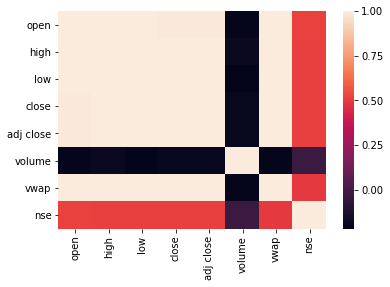

In [132]:
sns.heatmap(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [133]:
abs(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

open   high    low  close  adj close  volume   vwap    nse
open        True   True   True   True       True   False   True  False
high        True   True   True   True       True   False   True  False
low         True   True   True   True       True   False   True  False
close       True   True   True   True       True   False   True  False
adj close   True   True   True   True       True   False   True  False
volume     False  False  False  False      False    True  False  False
vwap        True   True   True   True       True   False   True  False
nse        False  False  False  False      False   False  False   True

##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse'. So these are the candidates for PCA.

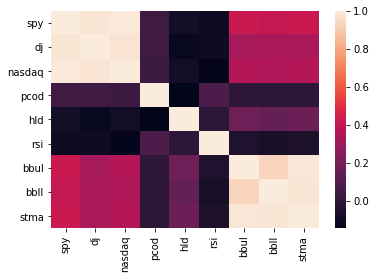

In [134]:
sns.heatmap(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [135]:
abs(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

spy     dj  nasdaq   pcod    hld    rsi   bbul   bbll   stma
spy      True   True    True  False  False  False  False  False  False
dj       True   True    True  False  False  False  False  False  False
nasdaq   True   True    True  False  False  False  False  False  False
pcod    False  False   False   True  False  False  False  False  False
hld     False  False   False  False   True  False  False  False  False
rsi     False  False   False  False  False   True  False  False  False
bbul    False  False   False  False  False  False   True   True   True
bbll    False  False   False  False  False  False   True   True   True
stma    False  False   False  False  False  False   True   True   True

##### There is very high multi-collinearity among the variables 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma'.  So these are the candidates for PCA.

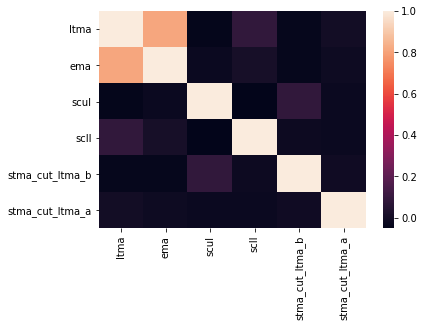

In [136]:
sns.heatmap(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [137]:
abs(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

ltma    ema   scul   scll  stma_cut_ltma_b  stma_cut_ltma_a
ltma              True   True  False  False            False            False
ema               True   True  False  False            False            False
scul             False  False   True  False            False            False
scll             False  False  False   True            False            False
stma_cut_ltma_b  False  False  False  False             True            False
stma_cut_ltma_a  False  False  False  False            False             True

##### There is very high multi-collinearity among the variables 'ltma', 'ema'.  So these are the candidates for PCA.

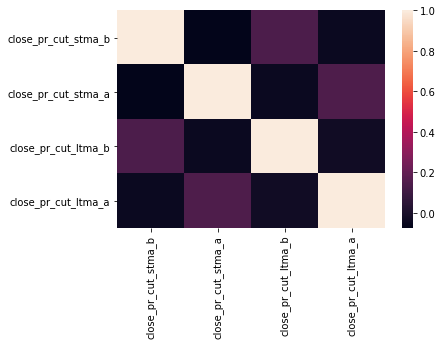

In [138]:
sns.heatmap(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [139]:
abs(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

close_pr_cut_stma_b  close_pr_cut_stma_a  \
close_pr_cut_stma_b                 True                False   
close_pr_cut_stma_a                False                 True   
close_pr_cut_ltma_b                False                False   
close_pr_cut_ltma_a                False                False   

                     close_pr_cut_ltma_b  close_pr_cut_ltma_a  
close_pr_cut_stma_b                False                False  
close_pr_cut_stma_a                False                False  
close_pr_cut_ltma_b                 True                False  
close_pr_cut_ltma_a                False                 True

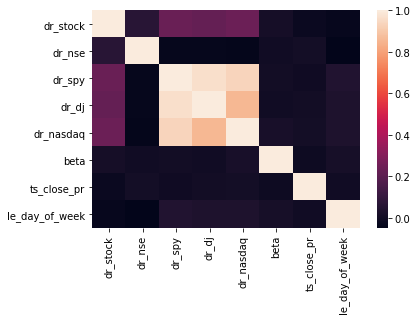

In [140]:
sns.heatmap(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [141]:
abs(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

dr_stock  dr_nse  dr_spy  dr_dj  dr_nasdaq   beta  \
dr_stock            True   False   False  False      False  False   
dr_nse             False    True   False  False      False  False   
dr_spy             False   False    True   True       True  False   
dr_dj              False   False    True   True       True  False   
dr_nasdaq          False   False    True   True       True  False   
beta               False   False   False  False      False   True   
ts_close_pr        False   False   False  False      False  False   
le_day_of_week     False   False   False  False      False  False   

                ts_close_pr  le_day_of_week  
dr_stock              False           False  
dr_nse                False           False  
dr_spy                False           False  
dr_dj                 False           False  
dr_nasdaq             False           False  
beta                  False           False  
ts_close_pr            True           False  
le_day_of_week        False            True

##### There is very high multi-collinearity among the variables 'dr_spy', 'dr_dj', 'dr_nasdaq'.  So these are the candidates for PCA.

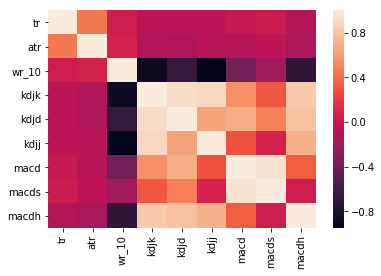

In [142]:
sns.heatmap(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [143]:
abs(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

tr    atr  wr_10   kdjk   kdjd   kdjj   macd  macds  macdh
tr      True  False  False  False  False  False  False  False  False
atr    False   True  False  False  False  False  False  False  False
wr_10  False  False   True   True  False   True  False  False  False
kdjk   False  False   True   True   True   True  False  False   True
kdjd   False  False  False   True   True  False  False  False   True
kdjj   False  False   True   True  False   True  False  False   True
macd   False  False  False  False  False  False   True   True  False
macds  False  False  False  False  False  False   True   True  False
macdh  False  False  False   True   True   True  False  False   True

##### There is very high multi-collinearity among the variables 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'. So these are the candidates for PCA.

### Data preparation for PCA
Variables for PCA: 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma',
'ltma', 'ema', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'

In [144]:
y = temp_stock1['price_movmnt']
X = temp_stock1.drop(['price_movmnt'], axis=1)

In [145]:
vars_pca = ['open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj',         
         'nasdaq', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_spy', 'dr_dj', 
         'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']

In [146]:
pca_X = temp_stock1[vars_pca]
print('pca_X.shape', pca_X.shape)
pca_X.head()


pca_X.shape (1113, 25)


open        high         low       close   adj close  \
date                                                                     
2013-06-25  280.243988  281.727997  269.212006  278.463013  275.258759   
2013-06-26  278.018005  279.748993  266.294006  269.756989  266.652924   
2013-06-27  271.635986  274.506012  260.308014  267.432007  264.354706   
2013-06-28  272.279999  279.006989  272.279999  278.315002  275.112457   
2013-07-01  275.049988  287.960999  274.059998  286.725006  283.425720   

              vwap          nse          spy            dj       nasdaq  \
date                                                                      
2013-06-25  279.43  5590.250000  1588.030029  14760.309570  3347.889893   
2013-06-26  273.09  5609.100098  1603.260010  14910.139648  3376.219971   
2013-06-27  269.04  5588.700195  1613.199951  15024.490234  3401.860107   
2013-06-28  280.00  5682.350098  1606.280029  14909.599609  3403.250000   
2013-07-01  286.57  5842.200195  1614.959961  14974.959961  3434.489990   

              ...       dr_spy     dr_dj  dr_nasdaq      wr_10       kdjk  \
date          ...                                                           
2013-06-25    ...     0.009497  0.006873   0.008170  67.192682  32.480596   
2013-06-26    ...     0.009590  0.010151   0.008462  88.870731  25.363487   
2013-06-27    ...     0.006200  0.007669   0.007594  80.798892  23.309360   
2013-06-28    ...    -0.004290 -0.007647   0.000409  51.466247  32.206240   
2013-07-01    ...     0.005404  0.004384   0.009179  26.647946  48.730431   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-06-25  36.031684  25.378419 -3.093208 -0.932388 -4.321640  
2013-06-26  32.475619  11.139224 -4.312393 -1.608389 -5.408008  
2013-06-27  29.420199  11.087683 -5.403905 -2.367492 -6.072825  
2013-06-28  30.348879  35.920961 -5.329392 -2.959872 -4.739040  
2013-07-01  36.476063  73.239166 -4.539437 -3.275785 -2.527303  

[5 rows x 25 columns]

In [147]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

pca_X_std = StandardScaler().fit_transform(pca_X)
print(pca_X_std.shape)
pca_X_std


(1113, 25)


array([[-2.09578372, -2.1468097 , -2.17609362, ..., -0.39975662,
        -0.1868687 , -0.73252787],
       [-2.12627257, -2.17383672, -2.21637434, ..., -0.52610273,
        -0.26142121, -0.91647946],
       [-2.21368585, -2.24543948, -2.2990063 , ..., -0.63921785,
        -0.3451386 , -1.02905104],
       ...,
       [-0.133634  , -0.20791504, -0.14979961, ...,  0.04356377,
        -0.19560997,  0.74302595],
       [-0.20896643, -0.07476046, -0.13392483, ...,  0.15871086,
        -0.12265869,  0.89529758],
       [-0.03159263, -0.03447292, -0.06352322, ...,  0.18503948,
        -0.0586939 ,  0.78491738]])

In [148]:
other_X = X.drop(pca_X.columns.tolist(), axis=1)
print('other_X.shape', other_X.shape)
other_X.head()


other_X.shape (1113, 19)


volume      pcod        hld        rsi  scul  scll  \
date                                                               
2013-06-25  12782946 -0.643005  12.515991  42.411223     0     0   
2013-06-26  10490521 -0.445008  13.454987  33.665487     0     1   
2013-06-27  21327052  1.878997  14.197998  22.321180     0     0   
2013-06-28   8200859  4.847992   6.726990  32.551865     0     0   
2013-07-01   7853378 -3.265014  13.901001  37.808203     0     0   

            stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                1                    0   
2013-06-28                0                0                    0   
2013-07-01                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  \
date                                                                        
2013-06-25                    0                    0                    0   
2013-06-26                    0                    0                    0   
2013-06-27                    0                    0                    0   
2013-06-28                    0                    0                    0   
2013-07-01                    0                    0                    0   

            dr_stock    dr_nse  beta  ts_close_pr  le_day_of_week         tr  \
date                                                                           
2013-06-25 -0.008630 -0.013656  0.63   285.951051               3  12.515991   
2013-06-26 -0.031265  0.003372 -9.27   285.700487               4  13.454987   
2013-06-27 -0.008619 -0.003637  2.37   285.729336               2  14.197998   
2013-06-28  0.040694  0.016757  2.43   286.448971               0  11.574982   
2013-07-01  0.030218  0.028131  1.07   287.406035               1  13.901001   

                  atr  
date                   
2013-06-25   9.644847  
2013-06-26   9.917035  
2013-06-27  10.222854  
2013-06-28  10.319445  
2013-07-01  10.575297

In [149]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

other_X_std = StandardScaler().fit_transform(other_X)
print(other_X_std.shape)
other_X_std


(1113, 19)


array([[ 1.05362737, -0.28302593,  0.08407676, ...,  0.68833569,
        -0.08548534, -1.47339901],
       [ 0.61854445, -0.24216847,  0.26208543, ...,  1.39508627,
         0.06378451, -1.35544877],
       [ 2.67522659,  0.23739917,  0.40294056, ..., -0.01841488,
         0.18189911, -1.22292448],
       ...,
       [-0.41992437,  0.06632988, -0.8289048 , ..., -0.01841488,
        -0.8510695 , -1.5887476 ],
       [ 0.26750351, -0.27415292,  0.80142766, ..., -1.43191604,
         0.51605198, -1.37451101],
       [-0.08045503, -0.33605663,  0.39384028, ..., -0.72516546,
         0.17426804, -1.24212669]])

### Feature Extraction for PCA

In [150]:
# Transpose the 'pca_X_std' and then calculate covariance matrix

cov_matrix = np.cov(pca_X_std.T)
print(cov_matrix.shape)

print('\nCovariance Matrix for independent variables \n\n%s', cov_matrix)


(25, 25)

Covariance Matrix for independent variables 

%s [[ 1.00089928e+00  9.98248189e-01  9.98299882e-01  9.95214908e-01
   9.95248877e-01  9.97313402e-01  5.20875627e-01  3.99536376e-01
   3.16182265e-01  3.31223553e-01  9.48455693e-01  9.39878377e-01
   9.60915489e-01  7.33983652e-01  9.72540579e-01 -2.69754505e-02
  -1.34171202e-02 -1.55450683e-02 -3.07590549e-02  8.01872861e-02
   1.07286354e-01  3.43792985e-02  2.71000178e-01  2.88993074e-01
  -1.82733366e-03]
 [ 9.98248189e-01  1.00089928e+00  9.98331672e-01  9.99018672e-01
   9.99021225e-01  9.99735655e-01  5.15364614e-01  3.92591134e-01
   3.08558525e-01  3.23979778e-01  9.47398937e-01  9.37878145e-01
   9.59375493e-01  7.31151761e-01  9.71062225e-01 -1.68144406e-02
  -3.66914036e-03 -4.91776493e-03 -5.56095010e-02  9.02261142e-02
   1.10333429e-01  5.02537556e-02  2.75585705e-01  2.91572943e-01
   5.23547337e-03]
 [ 9.98299882e-01  9.98331672e-01  1.00089928e+00  9.98607198e-01
   9.98566625e-01  9.99357478e-01  5.20303704

In [151]:
# Decompose the covariance matrix into eigen-values and eigen-vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [152]:
# Eigen-value is the magnitude(measure of signal) of each vector(independent variable)
# Here magnitude(measure of signal) refers to the variance captured by each dimension(independent variable) in mathematical space

print(eig_vals.shape)
eig_vals


(25,)


array([ 1.14261635e+01,  5.04589782e+00,  3.19197536e+00,  2.77011767e+00,
        1.49974188e+00,  4.84410005e-01,  1.46346014e-01,  1.39702941e-01,
        1.03798393e-01,  6.47919489e-02,  5.89695422e-02,  4.26902010e-02,
        1.61380741e-02,  1.57961036e-02,  5.22850148e-03,  3.40549967e-03,
        3.56866112e-03,  2.24882923e-03,  8.02574137e-04,  3.81731087e-04,
        2.93041936e-04,  1.37345987e-05,  2.13733649e-12, -1.75150617e-16,
        9.73121549e-17])

In [153]:
# eigenvectors of the covariance matrix represent the principal components(the directions of maximum variance)
# Eigen-vector consists of cosine values of each independent variable on every other dimension

print(eig_vecs.shape)
eig_vecs


(25, 25)


array([[ 2.86980535e-01,  7.75866178e-02,  8.10750101e-02,
         2.76651817e-02, -2.21289832e-02, -3.91780162e-02,
         1.90764904e-02,  3.31639534e-03,  9.90430707e-02,
         9.73466191e-02, -5.77124551e-02,  9.23197651e-02,
        -3.34418718e-02,  1.75961330e-02,  4.49422713e-01,
        -6.27195271e-01,  9.95176940e-02,  1.36664539e-01,
        -4.33746587e-01,  3.88896685e-02, -2.36039978e-01,
         4.22798557e-03,  1.45173576e-06,  2.21915597e-11,
         3.47414773e-12],
       [ 2.86544708e-01,  8.36400077e-02,  7.92990498e-02,
         3.33846141e-02, -3.03193742e-02, -1.54294435e-02,
         5.03808740e-02, -3.13044789e-02,  7.14610315e-02,
         4.17133870e-02, -4.96485944e-02, -2.11470771e-02,
        -2.09659616e-02,  1.84919044e-02,  1.43496953e-01,
         4.78367768e-02, -1.08211162e-01,  7.15622601e-01,
         2.47834701e-01, -1.12513038e-02,  5.29133915e-01,
         6.42307857e-03, -6.60248069e-07, -9.87089395e-12,
        -1.60295390e-12],
    

In [154]:
print("Eigen Values:")
pd.DataFrame(eig_vals).T

Eigen Values:


0         1         2         3         4        5         6   \
0  11.426163  5.045898  3.191975  2.770118  1.499742  0.48441  0.146346   

         7         8         9       ...             15        16        17  \
0  0.139703  0.103798  0.064792      ...       0.003405  0.003569  0.002249   

         18        19        20        21            22            23  \
0  0.000803  0.000382  0.000293  0.000014  2.137336e-12 -1.751506e-16   

             24  
0  9.731215e-17  

[1 rows x 25 columns]

In [155]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative Variance Explained\n\n', cum_var_exp)


Cumulative Variance Explained

 [ 45.66358956  65.82904645  78.58547627  89.65599146  95.64956907
  97.58546817  98.17032628  98.72863597  99.1434565   99.40239144
  99.63805768  99.80866506  99.87315936  99.936287    99.95718222
  99.97144404  99.9850538   99.99404103  99.99724844  99.998774
  99.99994511 100.         100.         100.         100.        ]


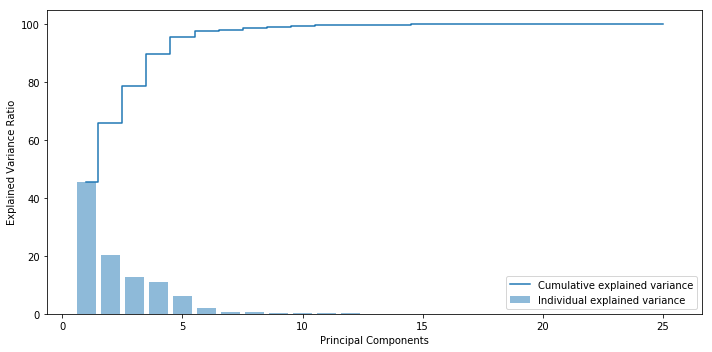

In [156]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observation:
Here the first 5 principal components capture 94.23% of the explained cumulative variance among all the independent variables. Choosing 5 PCs will help to maximize the signal of the data, while preserving the low-dimensionality.

After 5 PCs the the difference between consecutive cumulative variances are getting converged, so k=5 would be preferable.

#### Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace( k≤d )

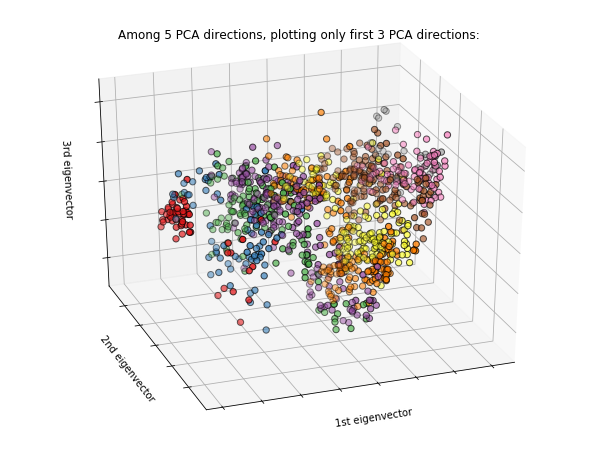

In [157]:
# Here k = 5 from the above observation

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Build PCA on the entire dataset(all IVs)
X_reduced = PCA(n_components=5).fit_transform(pca_X_std)

# Plotting only first 3 PCA dimensions  
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=pca_X.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Among 5 PCA directions, plotting only first 3 PCA directions:")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Construct a projection matrix W from the "top" k eigenvectors.

In [158]:
#Sort the eigen-pairs by descending order of the eigen-values

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(11.426163483996842,
  array([ 0.28698054,  0.28654471,  0.28676644,  0.28614711,  0.28659072,
          0.28523417,  0.20204359,  0.1710187 ,  0.14676461,  0.15345274,
          0.28433444,  0.28177545,  0.28807582,  0.24539088,  0.28992528,
         -0.00624582, -0.00122039, -0.00322082,  0.01787018, -0.01358124,
         -0.00834003, -0.01677663,  0.03644952,  0.04772678, -0.02744391])),
 (5.045897822960199,
  array([ 0.07758662,  0.08364001,  0.08489752,  0.08896173,  0.08743096,
          0.08910959, -0.10623261, -0.10907443, -0.10820201, -0.1254838 ,
         -0.02740703, -0.03844475, -0.03332517, -0.12746461, -0.0153063 ,
          0.04087781,  0.03961139,  0.04331852, -0.37057002,  0.41818266,
          0.4022521 ,  0.35450621,  0.33242769,  0.24568577,  0.33189458])),
 (3.1919753579077024,
  array([ 0.08107501,  0.07929905,  0.07329071,  0.07231502,  0.06972083,
          0.08433741, -0.31309589, -0.38154909, -0.39499317, -0.39398486,
          0.08522143,  0.10329736,  0.095

In [159]:
#Collect five eigen-vectors that correspond to the five largest values to capture about 94.23% of the variance 

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))

# W is 25*5 dimensional projection matrix from the top five eigen-vectors
print('Shape of W = ', W.shape)
print('\nProjection matrix W:\n\n', W)


Shape of W =  (25, 5)

Projection matrix W:

 [[ 0.28698054  0.07758662  0.08107501  0.02766518 -0.02212898]
 [ 0.28654471  0.08364001  0.07929905  0.03338461 -0.03031937]
 [ 0.28676644  0.08489752  0.07329071  0.03111215 -0.02575879]
 [ 0.28614711  0.08896173  0.07231502  0.0359027  -0.03641439]
 [ 0.28659072  0.08743096  0.06972083  0.03448993 -0.0360689 ]
 [ 0.28523417  0.08910959  0.08433741  0.03782297 -0.0326406 ]
 [ 0.20204359 -0.10623261 -0.31309589 -0.16698028  0.14519706]
 [ 0.1710187  -0.10907443 -0.38154909 -0.16438539  0.2020188 ]
 [ 0.14676461 -0.10820201 -0.39499317 -0.16947533  0.23886933]
 [ 0.15345274 -0.1254838  -0.39398486 -0.17649478  0.20014422]
 [ 0.28433444 -0.02740703  0.08522143  0.05460223 -0.07139942]
 [ 0.28177545 -0.03844475  0.10329736  0.05047079 -0.04628949]
 [ 0.28807582 -0.03332517  0.09562288  0.05352796 -0.06028893]
 [ 0.24539088 -0.12746461 -0.09209246 -0.03550279 -0.26959284]
 [ 0.28992528 -0.0153063   0.08688256  0.04495071 -0.06670403]
 [-0.0062

In [160]:
"""Using the projection matrix W transform the entire (1707, 25) dimensional dataset(pca_X_std) onto 
the five principal components by calculating the matrix dot product"""

pca_X_trnsfrmd = pca_X_std.dot(W)
print(pca_X_trnsfrmd.shape)
pca_X_trnsfrmd


(1113, 5)


array([[-7.57687348, -1.25088925,  1.06916328,  2.37800537,  0.13758903],
       [-7.67452741, -2.02828871,  1.09592486,  2.72287824,  0.42346237],
       [-7.80246943, -2.19725016,  1.19300728,  2.24694342,  0.30096727],
       ...,
       [ 0.89540428,  0.80451625, -4.75586024, -1.98329726,  1.46897082],
       [ 1.03423251,  1.39241826, -4.17415714, -3.51060448,  1.16787316],
       [ 1.11871245,  0.75966659, -4.30602812, -2.26554475,  1.66373391]])

### Data preparation for model building

In [161]:
# Combining all the independent variables (PCA variables and other variables) for model building
X = np.hstack((pca_X_trnsfrmd, other_X_std))
print('X.shape', X.shape)
X

X.shape (1113, 24)


array([[-7.57687348, -1.25088925,  1.06916328, ...,  0.68833569,
        -0.08548534, -1.47339901],
       [-7.67452741, -2.02828871,  1.09592486, ...,  1.39508627,
         0.06378451, -1.35544877],
       [-7.80246943, -2.19725016,  1.19300728, ..., -0.01841488,
         0.18189911, -1.22292448],
       ...,
       [ 0.89540428,  0.80451625, -4.75586024, ..., -0.01841488,
        -0.8510695 , -1.5887476 ],
       [ 1.03423251,  1.39241826, -4.17415714, ..., -1.43191604,
         0.51605198, -1.37451101],
       [ 1.11871245,  0.75966659, -4.30602812, ..., -0.72516546,
         0.17426804, -1.24212669]])

### Model building

In [162]:
# Import suite of algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [163]:
# Create objects of required models

models = []
models.append(("LR", LogisticRegression()))
models.append(("GNB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear", SVC(kernel="linear")))
models.append(("SVM RBF", SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging", BaggingClassifier()))
models.append(("GradientBoosting", GradientBoostingClassifier()))
models.append(("LinearSVC", LinearSVC()))
models.append(("Ridge", RidgeClassifier()))
models.append(("MLP", MLPClassifier()))

#models

### Time-Series-Split 

### Models - with Hyper-parameter tuning

In [164]:
from sklearn.model_selection import TimeSeriesSplit

num_splits = 10

tscv = TimeSeriesSplit(n_splits = num_splits)
print(tscv)  

k=1
grid_result = []
accuracies = []
    
for name, model in models:
    
    if name=='KNN':
        print('Model name: ', name)
        k_values = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])        
        param_grid = dict(n_neighbors=k_values)
        grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=None)

        for train_index, test_index in tscv.split(X): 

            print("\n\n----------------------- Split-{} -----------------------".format(k))    
            print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #print(model.get_params().keys())
            grid_result = grid.fit(X_train, y_train)           

            # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
            print('\ngrid_result.best_score_', grid_result.best_score_)
            print('\ngrid_result.best_params_', grid_result.best_params_)
            means = grid_result.cv_results_['mean_test_score']
            stds = grid_result.cv_results_['std_test_score']
            params = grid_result.cv_results_['params']
            print('\n')
            for mean, stdev, param in zip(means, stds, params):
                print("%f (%f) with: %r" % (mean, stdev, param))
            
            print("\n\n*************** KNN accuracy ***************") 
            knn = KNeighborsClassifier(n_neighbors=int(grid_result.best_params_['n_neighbors']))
            knn.fit(X_train, y_train)
            knn_accuracy = round(knn.score(X_test, y_test),2)
            print("\nknn_accuracy for Split-{} = {}".format(k, knn_accuracy))
            accuracies.append(knn_accuracy)
                    
            k+=1
        print("\nAverage KNN accuracy for {} Time-Series-Split = {}".format(num_splits, round(sum(accuracies)/len(accuracies),2)))
       
            


TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name:  KNN


----------------------- Split-1 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102] 

TEST-set: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203]

grid_result.best_sco


grid_result.best_score_ 0.7142857142857143

grid_result.best_params_ {'n_neighbors': 7}


0.689655 (0.029760) with: {'n_neighbors': 1}
0.709360 (0.037437) with: {'n_neighbors': 3}
0.697044 (0.022012) with: {'n_neighbors': 5}
0.714286 (0.043075) with: {'n_neighbors': 7}
0.689655 (0.008309) with: {'n_neighbors': 9}
0.709360 (0.015049) with: {'n_neighbors': 11}
0.711823 (0.010385) with: {'n_neighbors': 13}
0.701970 (0.018528) with: {'n_neighbors': 15}
0.699507 (0.020772) with: {'n_neighbors': 17}
0.689655 (0.020031) with: {'n_neighbors': 19}
0.682266 (0.032147) with: {'n_neighbors': 21}
0.682266 (0.018191) with: {'n_neighbors': 23}
0.699507 (0.025730) with: {'n_neighbors': 25}
0.694581 (0.013286) with: {'n_neighbors': 27}
0.692118 (0.021422) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-4 = 0.72


----------------------- Split-5 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 


grid_result.best_score_ 0.7418899858956276

grid_result.best_params_ {'n_neighbors': 29}


0.689704 (0.025974) with: {'n_neighbors': 1}
0.698166 (0.042830) with: {'n_neighbors': 3}
0.703808 (0.050006) with: {'n_neighbors': 5}
0.712271 (0.050032) with: {'n_neighbors': 7}
0.734838 (0.063554) with: {'n_neighbors': 9}
0.719323 (0.065544) with: {'n_neighbors': 11}
0.722144 (0.064828) with: {'n_neighbors': 13}
0.719323 (0.064867) with: {'n_neighbors': 15}
0.737659 (0.070048) with: {'n_neighbors': 17}
0.720733 (0.057810) with: {'n_neighbors': 19}
0.724965 (0.070546) with: {'n_neighbors': 21}
0.723554 (0.066869) with: {'n_neighbors': 23}
0.734838 (0.085917) with: {'n_neighbors': 25}
0.729196 (0.070559) with: {'n_neighbors': 27}
0.741890 (0.065971) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-7 = 0.71


----------------------- Split-8 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17



grid_result.best_score_ 0.8133918770581778

grid_result.best_params_ {'n_neighbors': 9}


0.748628 (0.007408) with: {'n_neighbors': 1}
0.762898 (0.013492) with: {'n_neighbors': 3}
0.773875 (0.008755) with: {'n_neighbors': 5}
0.792536 (0.011705) with: {'n_neighbors': 7}
0.813392 (0.008351) with: {'n_neighbors': 9}
0.791438 (0.005171) with: {'n_neighbors': 11}
0.782656 (0.003978) with: {'n_neighbors': 13}
0.780461 (0.010549) with: {'n_neighbors': 15}
0.784852 (0.010348) with: {'n_neighbors': 17}
0.776070 (0.012840) with: {'n_neighbors': 19}
0.789243 (0.016989) with: {'n_neighbors': 21}
0.785950 (0.028472) with: {'n_neighbors': 23}
0.784852 (0.018527) with: {'n_neighbors': 25}
0.784852 (0.011221) with: {'n_neighbors': 27}
0.783754 (0.018401) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-9 = 0.73


----------------------- Split-10 -----------------------

TRAIN-set: [   0    1    2 ... 1009 1010 1011] 

TEST-set: [1012 1013 1014 1015 1016

### Models - without Hyper-parameter tuning

In [165]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  
TimeSeriesSplit(max_train_size=None, n_splits=3)

k=1
for train_index, test_index in tscv.split(X): 
    
    print("\n\n----------------------- Split-{} -----------------------".format(k))   
    print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("\n\n\n*************** {}-fold validation ***************\n".format(k))
    # Find accuracy of models
    results = []
    for name, model in models:
        cv_result = cross_val_score(model, X_train, y_train, scoring = "accuracy")
        results.append(tuple([name, cv_result.mean(), cv_result.std()]))
        
    results.sort(key=lambda x: x[1], reverse = True)    
    for i in range(len(results)):
        print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))
        
    k+=1
    
    


TimeSeriesSplit(max_train_size=None, n_splits=10)


----------------------- Split-1 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102] 

TEST-set: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203]



*************** 1-fold validation *

DecisionTree         99.61 (+/-) 0.56 
AdaBoost             99.61 (+/-) 0.56 
Bagging              99.61 (+/-) 0.56 
GradientBoosting     99.61 (+/-) 0.56 
Random Forest        96.25 (+/-) 4.11 
LinearSVC            96.06 (+/-) 1.22 
LR                   95.27 (+/-) 1.28 
SVM Linear           92.70 (+/-) 2.66 
Ridge                91.12 (+/-) 1.28 
MLP                  88.17 (+/-) 2.94 
GNB                  77.32 (+/-) 9.68 
SVM RBF              74.16 (+/-) 7.67 
KNN                  66.47 (+/-) 2.01 


----------------------- Split-6 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 1

DecisionTree         100.00 (+/-) 0.00 
AdaBoost             100.00 (+/-) 0.00 
Bagging              100.00 (+/-) 0.00 
GradientBoosting     100.00 (+/-) 0.00 
Random Forest        98.77 (+/-) 0.17 
LinearSVC            97.90 (+/-) 0.35 
LR                   96.54 (+/-) 0.97 
SVM Linear           95.93 (+/-) 1.32 
MLP                  94.32 (+/-) 0.17 
Ridge                93.58 (+/-) 0.63 
SVM RBF              89.51 (+/-) 2.44 
GNB                  83.70 (+/-) 1.68 
KNN                  75.06 (+/-) 1.36 


----------------------- Split-9 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 1